# Bibliotecas

In [144]:
## Pandas 
import pandas as pd
import numpy as np
import seaborn as sns # Alternativa pra gerar gráficos
from sklearn.cluster import KMeans ## Agrupamento pela média das variáveis
import matplotlib.pyplot as plot
from sklearn.preprocessing import OrdinalEncoder # codificar variaveis categoricas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # Padronizar dados
from dfply import *
import joblib ## Salvar modelo como pickle
from sklearn.impute import SimpleImputer # imputação simples
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold ### funcionalidadde para separar os dados em treino e teste
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
from scipy.stats import skew,randint #randint: sorteio # Assimetria  -- Para os modelos o ideal é ter preditores com pouca assimetria, mas isso não é extremamente importante
from sklearn.feature_selection import VarianceThreshold # Variancia nula -- Verifica se alguma variável tem variancia nula - O ideal é que não tenha esse tipo de variável nas com as preditoras pois elas não representam a variabilidade dos dados
from math import sqrt
import random # semente

#%pip install imbalanced-learn
#superamostragem  e subamostragem
#from imblearn.over_sampling import SVMSMOTE
#from imblearn.under_sampling import RandomUnderSampler

# modelo LASSO
from sklearn.linear_model  import LassoCV, LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

# modelo de XGBoost
#!pip install xgboost
import xgboost  as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization
from sklearn.feature_selection import SequentialFeatureSelector

# modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm # ver o resumo do modelo

# modelo de Floresta Aleatória (Ramdon Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# comparação de modelos
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve , auc, mean_squared_error, mean_absolute_error,recall_score,precision_score,classification_report
#%pip install numpy==2.2
#%pip install ipywidgets
import shap #  Análise com SHAP
from scipy.special import expit  # sigmoid

import joblib ## Salvar modelo como pickle

##Visualização data frame pandas sem truncamento
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

# permite a vizualição de números flutuantes com duas casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)

np.random.seed(2025)
random.seed(2025)

# Base de Treino

### Análise

In [145]:
df_train=pd.read_csv("C:/Users/fernando.monteiro/deep-torch-example/KAB/Behavior_KAB/Desenvolvimento/Cluster/df_train.csv", sep=",", header=0, index_col=None)

In [146]:
X_train=df_train.copy()

In [147]:
X_train=X_train.drop(columns=["valor_da_parcela_aberto","limite_total","situacao_conta","media_atraso_dias","qtd_reneg_aberto_regular","limite_total_utilizado","data_ultima_alteracao_limite"])

In [148]:
X_train.head()

,sexo,idade,estado_civil,nacionalidade,tempo_relacionamento_kredilig_meses,canal_origem,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,principal_total_fechado,qtd_parcelas_pagas,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,ocupacao,grau_escolaridade_cat,regiao,tipo_cal_entre_contratos,tipo_valor_entrada,mean_atraso_possui_info,possui_contratos_a_vista,principal_total,cpf_cnpj,inad_e_reneg,fx_renda_valida,fx_principal_total_nr,fx_principal_total,fx_ult_limite,Cluster
0,F,47,CASADO,BRASILEIRO,33.23,Digital,2.95,7,9668.22,66,6.77,26.43,33.20,8737.93,8737.93,0.00,1617.00,EMPRESTIMO/FINANCIAMENTO,0,8.43,8,6552.00,6552.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Grande_Florianópolis,Contratos_dias_diferentes,N_Paga_entrada,SIM,NAO,9668.22,2055919903.00,0,"De 1 SM a 1,25 SM",R$5 mil a R$10mil,"R$7,5 mil a R$10mil","R$5 mil a R$7,5 mil",1
1,F,42,CASADO,BRASILEIRO,80.93,Fisico,0.00,0,53880.66,100,10.83,29.63,40.47,5534.80,2255.00,0.00,1940.00,EMPRESTIMO,0,26.23,10,14000.00,14000.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Vale_do_Itajaí,Apenas_1_contrato,N_Paga_entrada,SIM,NAO,69278.40,4909271902.00,1,"De 1,25 SM a 1,5 SM",R$2 mil a R$5mil,Acima de R$20mil,R$10 mil a R$15mil,0
2,F,43,CASADO,BRASILEIRO,81.83,Fisico,0.00,0,0.00,7,1.80,7.00,8.80,2437.35,3487.99,0.00,5000.00,FINANCIAMENTO,0,2.33,1,9552.00,11675.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Sul_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,N_base_CARTAO,3487.99,3177736901.00,0,Acima de 3 SM,R$2 mil a R$5mil,"R$2,5 mil a R$5 mil",R$10 mil a R$15mil,0
3,F,59,DIVORCIADO,BRASILEIRO,68.37,Fisico,0.00,0,0.00,6,30.17,5.73,35.90,0.00,0.00,0.00,1730.00,EMPRESTIMO,0,31.33,1,5000.00,5000.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Vale_do_Itajaí,Apenas_1_contrato,N_Paga_entrada,SIM,N_base_CARTAO,1248.30,74158287987.00,1,"De 1 SM a 1,25 SM",0,"R$1 mil a R$2,5 mil","R$2,5 mil a R$5 mil",0
4,M,38,CASADO,BRASILEIRO,20.80,Fisico,0.93,0,0.00,2,19.30,1.17,20.47,261.00,480.00,26.83,3000.00,FINANCIAMENTO,0,3.61,3,1000.00,1000.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Vale_do_Itajaí,Contratos_dias_diferentes,Paga_entrada,SIM,NAO,480.00,5599390942.00,1,"De 1,5 SM a 2 SM",Até R$2 mil,Até R$1 mil,Até R$1 mil,4


In [149]:
X_train.describe()

,idade,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,principal_total_fechado,qtd_parcelas_pagas,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,principal_total,cpf_cnpj,inad_e_reneg,Cluster
count,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00
mean,50.50,50.30,4.02,2.09,4228.21,38.17,9.13,18.82,27.95,5622.29,5407.64,35.84,2094.09,0.15,7.82,4.70,6316.62,7469.87,7033.25,33616537600.97,0.30,1.64
std,16.15,31.53,5.30,3.39,7211.87,52.44,10.85,12.97,11.26,7566.24,6615.41,191.55,796.72,1.46,10.01,5.64,4680.45,5602.47,9486.81,32114474503.50,0.46,1.23
min,18.00,6.03,0.00,0.00,0.00,0.00,-0.70,-0.17,-0.63,0.00,0.00,0.00,508.20,0.00,0.00,1.00,8.00,108.00,0.01,1148044.00,0.00,0.00
25%,38.00,22.73,0.00,0.00,410.00,9.00,0.83,7.63,18.83,1105.00,1449.00,0.00,1617.00,0.00,0.16,1.00,3000.00,3600.00,1882.31,5343088922.00,0.00,1.00
50%,51.00,43.70,2.50,1.00,2153.90,20.00,3.83,17.07,31.20,3169.31,3383.99,0.00,1888.00,0.00,3.39,3.00,5508.00,6569.00,4101.74,13985423416.00,0.00,2.00
75%,63.00,73.83,5.97,3.00,5234.24,47.00,15.13,30.87,38.23,7285.97,6989.87,0.00,2194.08,0.00,12.25,6.00,8256.00,9936.00,8645.17,63598009998.50,1.00,2.00
max,100.00,125.53,41.47,126.00,310660.49,1410.00,41.70,42.20,41.60,310434.77,287161.52,12460.00,23447.00,122.00,60.00,133.00,80000.00,100000.00,329851.85,99997908953.00,1.00,4.00


In [150]:
# Porcentagem de valores faltantes
(X_train.isnull().sum()).sort_values(ascending=False)

sexo                                        0
idade                                       0
estado_civil                                0
nacionalidade                               0
tempo_relacionamento_kredilig_meses         0
canal_origem                                0
media_meses_entre_contratos_combinado       0
qtd_contratos_fechado_regular               0
principal_total_fechado                     0
qtd_parcelas_pagas                          0
meses_ultimo_pagamento                      0
meses_entre_primeiro_e_ultimo_pagamento     0
meses_entre_primeiro_e_ultimo_fechamento    0
valor_pago_nr                               0
valor_principal_total_nr                    0
FIN_valor_medio_entrada_nr                  0
renda_valida_new                            0
produtos                                    0
qtd_total_fechado_a_vista                   0
mean_dias_maior_atraso                      0
qtd_contratos                               0
limite_total_primeiro_mes         

In [151]:
#Tipos
tipos = {
"sexo": "category",
"estado_civil": "category",
"grau_escolaridade_cat": "category",
"ocupacao": "category",
"nacionalidade": "category",
"canal_origem": "category",
"produtos": "category",
"Cluster": "category",
"tipo_cal_entre_contratos": "category",
"possui_contratos_a_vista": "category",
"tipo_valor_entrada": "category",
"mean_atraso_possui_info": "category",
"fx_renda_valida": "category",
"fx_ult_limite": "category",
"fx_principal_total":"category",
"fx_principal_total_nr":"category",
"regiao": "category",}

# conversão
X_train = X_train.astype({k: v for k, v in tipos.items()})

In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234006 entries, 0 to 234005
Data columns (total 38 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   sexo                                      234006 non-null  category
 1   idade                                     234006 non-null  int64   
 2   estado_civil                              234006 non-null  category
 3   nacionalidade                             234006 non-null  category
 4   tempo_relacionamento_kredilig_meses       234006 non-null  float64 
 5   canal_origem                              234006 non-null  category
 6   media_meses_entre_contratos_combinado     234006 non-null  float64 
 7   qtd_contratos_fechado_regular             234006 non-null  int64   
 8   principal_total_fechado                   234006 non-null  float64 
 9   qtd_parcelas_pagas                        234006 non-null  int64   
 10  meses_ul

In [153]:
# Frequência da variável target
X_train.Cluster.value_counts()
X_train.inad_e_reneg.value_counts()

inad_e_reneg
0    164537
1     69469
Name: count, dtype: int64

In [154]:
# Amostragem
#Variável de interesse
y_train = X_train >> select(X.inad_e_reneg)

# Remover a variável resposta do conjunto de dados
X_train.drop(['inad_e_reneg'],axis=1, inplace=True)

In [155]:
# Frequência da variável target no treino
print(y_train.value_counts()) #qtd treino

inad_e_reneg
0               164537
1                69469
Name: count, dtype: int64


In [156]:
ids_train = X_train["cpf_cnpj"]  
X_train = X_train.drop(columns=["cpf_cnpj"])
#ids_test = X_test["cpf_cnpj"]  
#X_test = X_test.drop(columns=["cpf_cnpj"])

### Base de treino - Pré processamento

In [157]:
# One hot encoding
X_train_dummy=pd.get_dummies(X_train, drop_first=True).astype(int)

In [158]:
X_train_dummy.head(10)

,idade,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,principal_total_fechado,qtd_parcelas_pagas,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,principal_total,sexo_M,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,nacionalidade_ESTRANGEIRO,canal_origem_Fisico,produtos_EMPRESTIMO/FINANCIAMENTO,produtos_FINANCIAMENTO,ocupacao_EMPREGADO_PRIVADO_AUTONOMO,ocupacao_OUTROS,ocupacao_RENDA_PASSIVA_PENSAO,ocupacao_SERVIDOR_PUBLICO,grau_escolaridade_cat_ENSINO_MEDIO,grau_escolaridade_cat_TECNICO_SUPERIOR,regiao_Grande_Florianópolis,regiao_Norte_Catarinense,regiao_Oeste_Catarinense,regiao_Serrana,regiao_Sul_Catarinense,regiao_Vale_do_Itajaí,tipo_cal_entre_contratos_Contratos_dias_diferentes,tipo_cal_entre_contratos_Contratos_mesmo_dia,tipo_valor_entrada_Paga_entrada,mean_atraso_possui_info_SIM,possui_contratos_a_vista_N_base_CARTAO,possui_contratos_a_vista_SIM,fx_renda_valida_Até 1 SM,"fx_renda_valida_De 1 SM a 1,25 SM","fx_renda_valida_De 1,25 SM a 1,5 SM","fx_renda_valida_De 1,5 SM a 2 SM",fx_renda_valida_De 2 SM a 3 SM,fx_principal_total_nr_Acima de R$20mil,fx_principal_total_nr_Até R$2 mil,fx_principal_total_nr_R$10 mil a R$20mil,fx_principal_total_nr_R$2 mil a R$5mil,fx_principal_total_nr_R$5 mil a R$10mil,fx_principal_total_Até R$1 mil,"fx_principal_total_R$1 mil a R$2,5 mil",fx_principal_total_R$10 mil a R$15mil,fx_principal_total_R$15 mil a R$20mil,"fx_principal_total_R$2,5 mil a R$5 mil","fx_principal_total_R$5 mil a R$7,5 mil","fx_principal_total_R$7,5 mil a R$10mil",fx_ult_limite_Até R$1 mil,"fx_ult_limite_R$1 mil a R$2,5 mil",fx_ult_limite_R$10 mil a R$15mil,fx_ult_limite_R$15 mil a R$20mil,"fx_ult_limite_R$2,5 mil a R$5 mil","fx_ult_limite_R$5 mil a R$7,5 mil","fx_ult_limite_R$7,5 mil a R$10mil",Cluster_1,Cluster_2,Cluster_3,Cluster_4
0,47,33,2,7,9668,66,6,26,33,8737,8737,0,1617,0,8,8,6552,6552,9668,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,42,80,0,0,53880,100,10,29,40,5534,2255,0,1940,0,26,10,14000,14000,69278,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,43,81,0,0,0,7,1,7,8,2437,3487,0,5000,0,2,1,9552,11675,3487,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,59,68,0,0,0,6,30,5,35,0,0,0,1730,0,31,1,5000,5000,1248,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,38,20,0,0,0,2,19,1,20,261,480,26,3000,0,3,3,1000,1000,480,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,56,44,9,0,3412,56,12,22,34,5084,3412,0,1828,0,27,4,6048,6048,7125,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
6,77,57,16,3,3036,23,2,35,38,3137,3036,0,2378,0,0,3,10500,9660,3036,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7,23,43,0,1,1846,14,15,11,26,2630,1846,0,1888,0,0,1,3000,5520,1846,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,41,7,4,0,0,10,0,7,7,2148,5982,0,2314,0,0,2,3000,6750,5982,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
9,35,101,0,1,1160,13,1,12,14,1260,1050,0,1730,0,29,2,2000,2200,1160,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [159]:
X_train_dummy.columns.to_list()

['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'renda_valida_new',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_primeiro_mes',
 'limite_total_ultimo_mes',
 'principal_total',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Gr

##### Correlação com a variável target

In [160]:
# Seleção de variáveis
X_train_d_select=X_train_dummy[['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'renda_valida_new',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_primeiro_mes',
 'limite_total_ultimo_mes',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'tipo_cal_entre_contratos_Contratos_dias_diferentes',
 'tipo_cal_entre_contratos_Contratos_mesmo_dia',
 'possui_contratos_a_vista_N_base_CARTAO',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'mean_atraso_possui_info_SIM',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil',
 'fx_ult_limite_Até R$1 mil',
 'fx_ult_limite_R$1 mil a R$2,5 mil',
 'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 'fx_ult_limite_R$5 mil a R$7,5 mil',
 'fx_ult_limite_R$7,5 mil a R$10mil',
 'Cluster_1',
 'Cluster_2',
 'Cluster_3',
 'Cluster_4']]

In [161]:
X_train_d_select.drop(columns=['qtd_total_fechado_a_vista', # alta correlação
                               "FIN_valor_medio_entrada_nr", # alta correlação
                               "principal_total_fechado", # alta correlação e pouca importancia
                               "mean_atraso_possui_info_SIM", # VIF alto e alta assimetria
                               "qtd_parcelas_pagas", # alta correlação
                               'valor_principal_total_nr',# alta correlação
                               "tipo_cal_entre_contratos_Contratos_dias_diferentes", # alta correlação e assimetria
                               "meses_entre_primeiro_e_ultimo_fechamento", # VIF alto
                               "limite_total_primeiro_mes",# alta correlação
                               "tempo_relacionamento_kredilig_meses", #VIF alta e menos importancia que a variável meses_entre_primeiro_e_ultimo_pagamento
                               'qtd_contratos_fechado_regular', #Vazamento de informação IV > 0.50
                               'produtos_EMPRESTIMO/FINANCIAMENTO', 
                               'Cluster_1',
                               'Cluster_2',
                               'Cluster_3',
                               'Cluster_4',
                               'possui_contratos_a_vista_N_base_CARTAO',
                               #'renda_valida_new', # categorização da renda
                               'limite_total_ultimo_mes', # categorização da renda
                               "nacionalidade_ESTRANGEIRO",# assimetria alta
                               'tipo_cal_entre_contratos_Contratos_dias_diferentes',
                               'tipo_cal_entre_contratos_Contratos_mesmo_dia',
                               #'canal_origem_Fisico',# Alto VIF
                               ], inplace=True, errors='ignore')

C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_4612\2908417988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_d_select.drop(columns=['qtd_total_fechado_a_vista', # alta correlação


In [162]:
# Correlação
# Pearson
df_corr = X_train_d_select.copy()
df_corr['target'] = y_train

correlacoes = df_corr.corr(numeric_only=True)['target'].drop('target').sort_values(key=abs, ascending=False)
print("Correlação com inad_reneg")
print(correlacoes)

Correlação com inad_reneg
meses_ultimo_pagamento                      0.29
produtos_FINANCIAMENTO                     -0.28
mean_dias_maior_atraso                      0.24
idade                                      -0.19
media_meses_entre_contratos_combinado      -0.19
canal_origem_Fisico                        -0.16
fx_ult_limite_Até R$1 mil                   0.14
fx_ult_limite_R$1 mil a R$2,5 mil           0.14
meses_entre_primeiro_e_ultimo_pagamento    -0.13
qtd_contratos                               0.12
fx_ult_limite_R$7,5 mil a R$10mil          -0.11
fx_ult_limite_R$10 mil a R$15mil           -0.10
ocupacao_EMPREGADO_PRIVADO_AUTONOMO         0.10
valor_pago_nr                              -0.09
tipo_valor_entrada_Paga_entrada            -0.09
fx_ult_limite_R$2,5 mil a R$5 mil           0.08
estado_civil_SOLTEIRO                       0.06
fx_principal_total_nr_R$10 mil a R$20mil   -0.06
ocupacao_OUTROS                             0.06
possui_contratos_a_vista_SIM               

In [ ]:
'''X_train_d_select=X_train_d_select[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 #'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr', # Voltar e analisar
 #'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 #'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 #'estado_civil_UNIAO ESTAVEL',
 #'estado_civil_VIUVO',
 'canal_origem_Fisico', # Voltar e analisar
 #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 #'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 #'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 #'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
# 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 # 'fx_ult_limite_Até R$1 mil',
 #'fx_ult_limite_R$1 mil a R$2,5 mil',
 #'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 #'fx_ult_limite_R$5 mil a R$7,5 mil',
 #'fx_ult_limite_R$7,5 mil a R$10mil',
 'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil',
 ]]'''

# VIF
pd.set_option('display.max_rows', None)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_d_select.columns
  
vif_data["VIF"] = [variance_inflation_factor(X_train_d_select.values, i)
                          for i in range(len(X_train_d_select.columns))]
print(vif_data.sort_values(by=['VIF'], ascending=False))

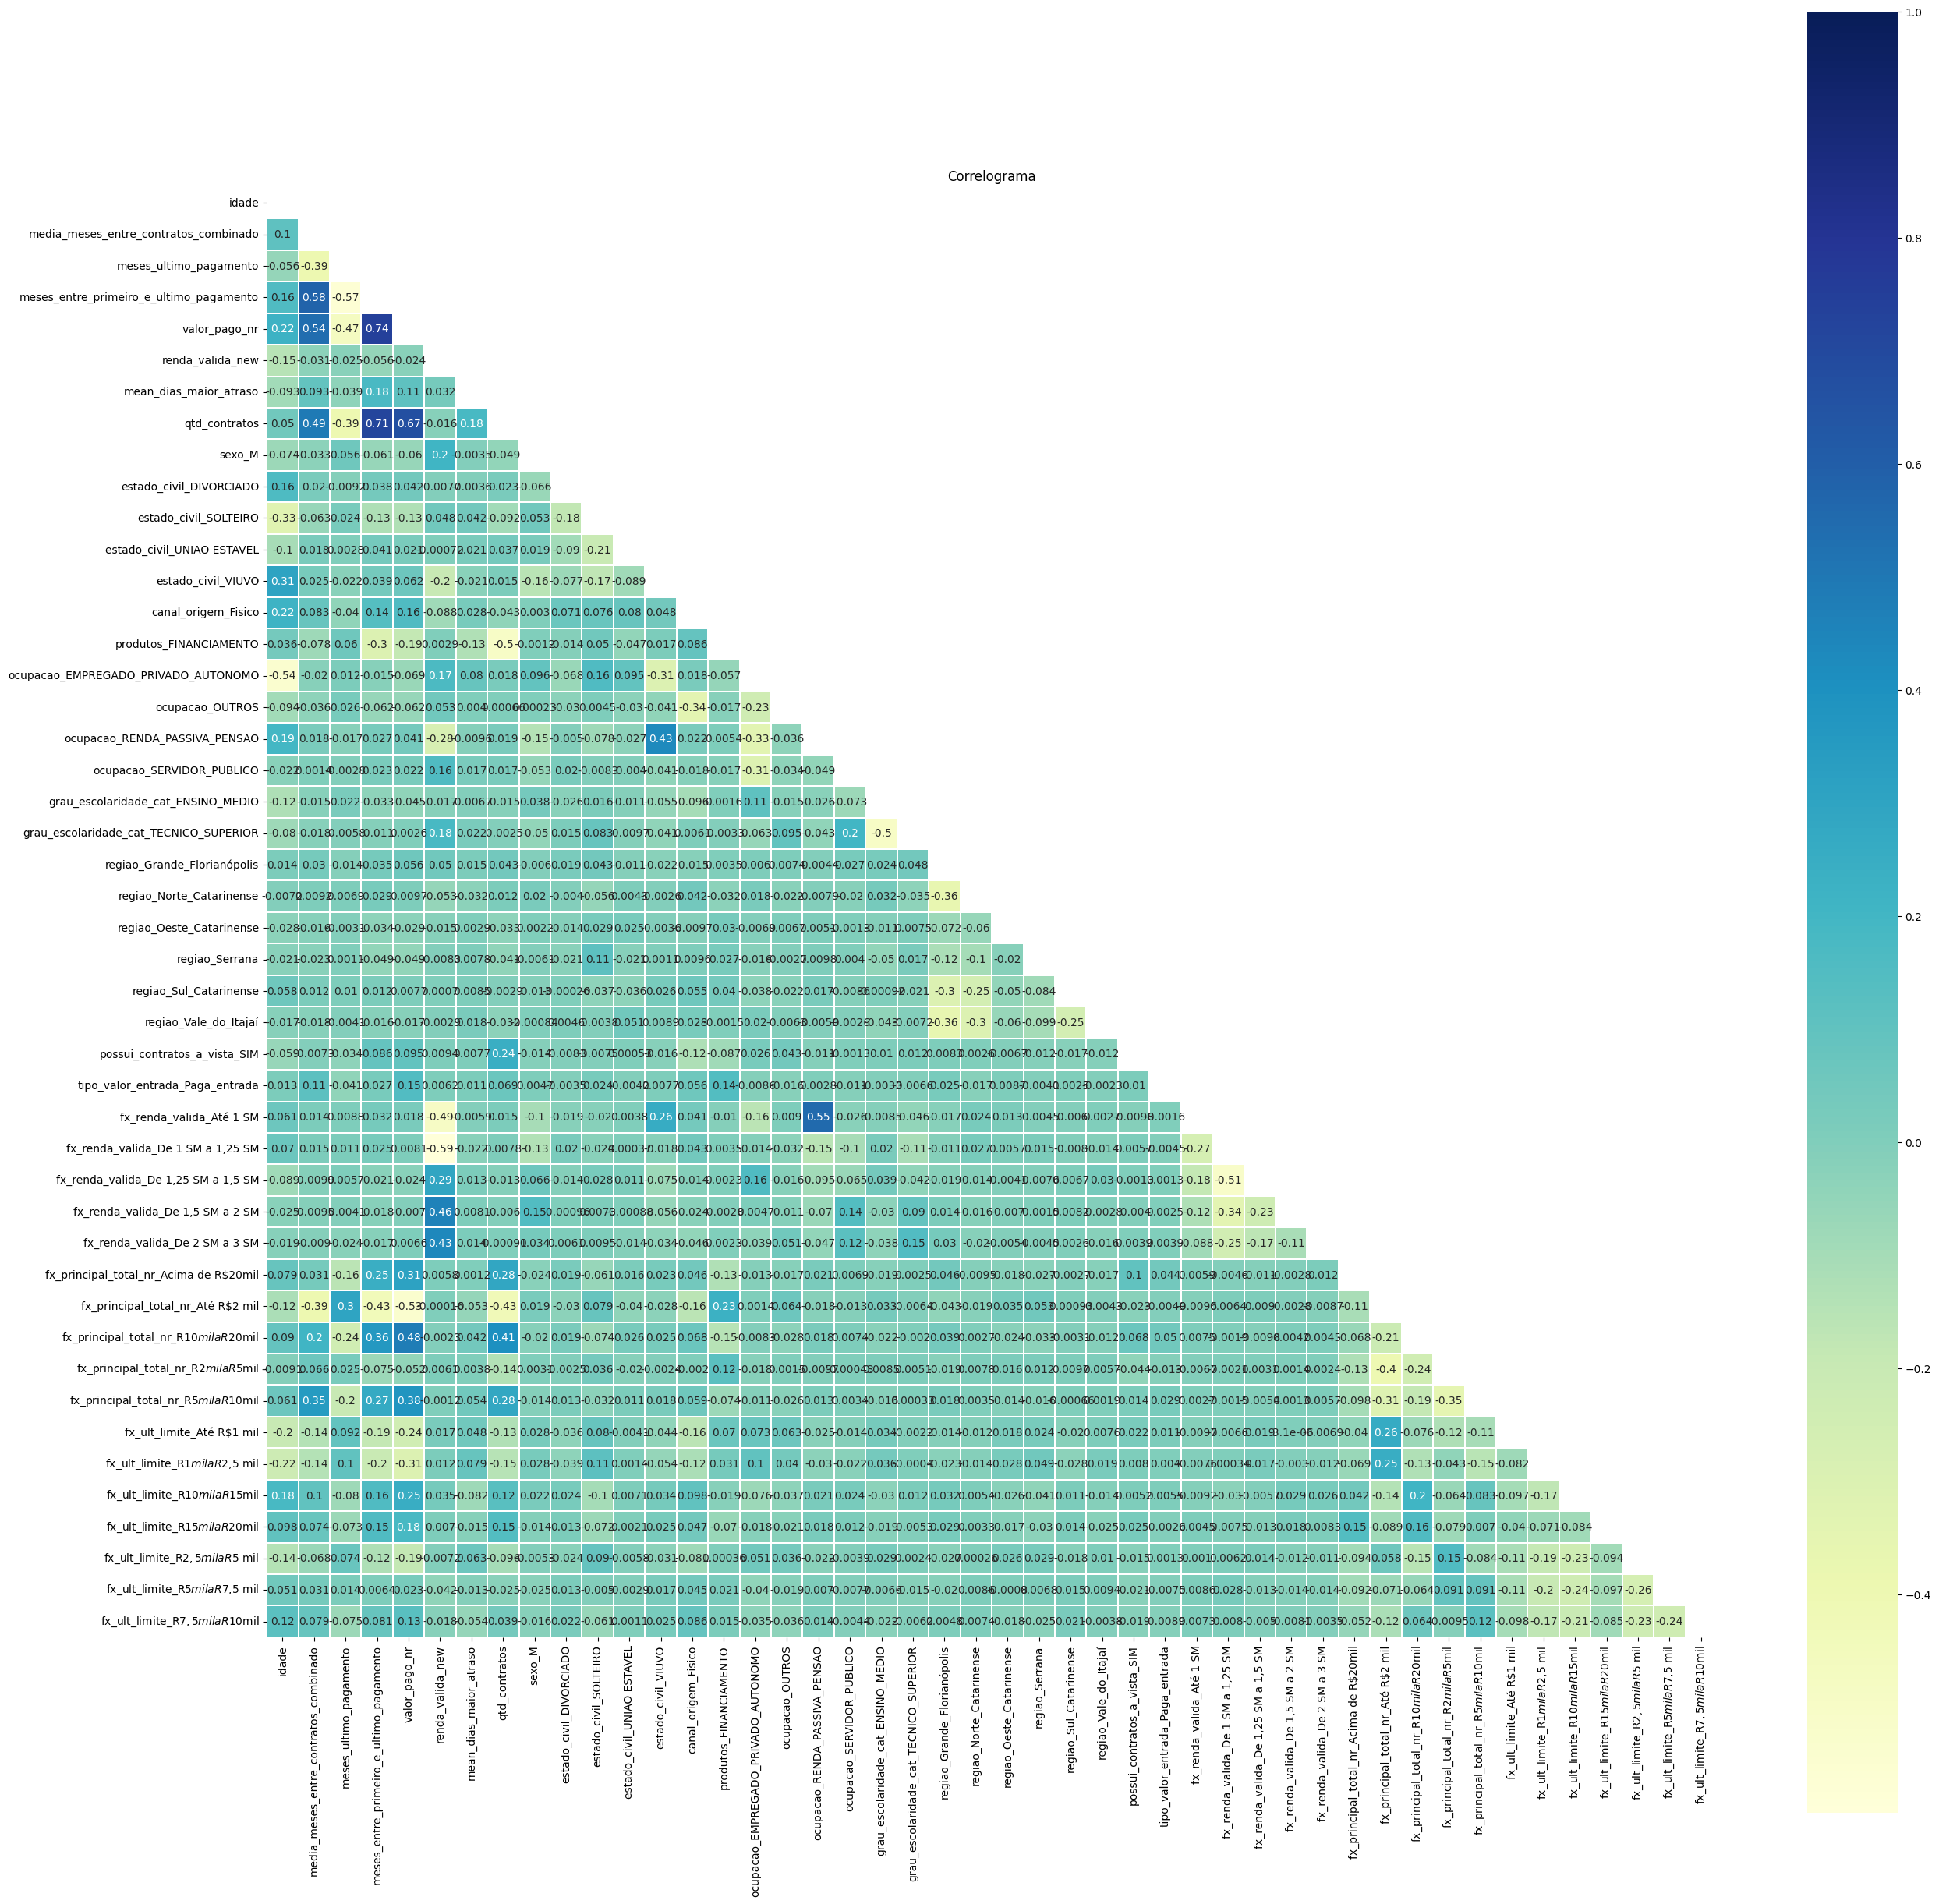

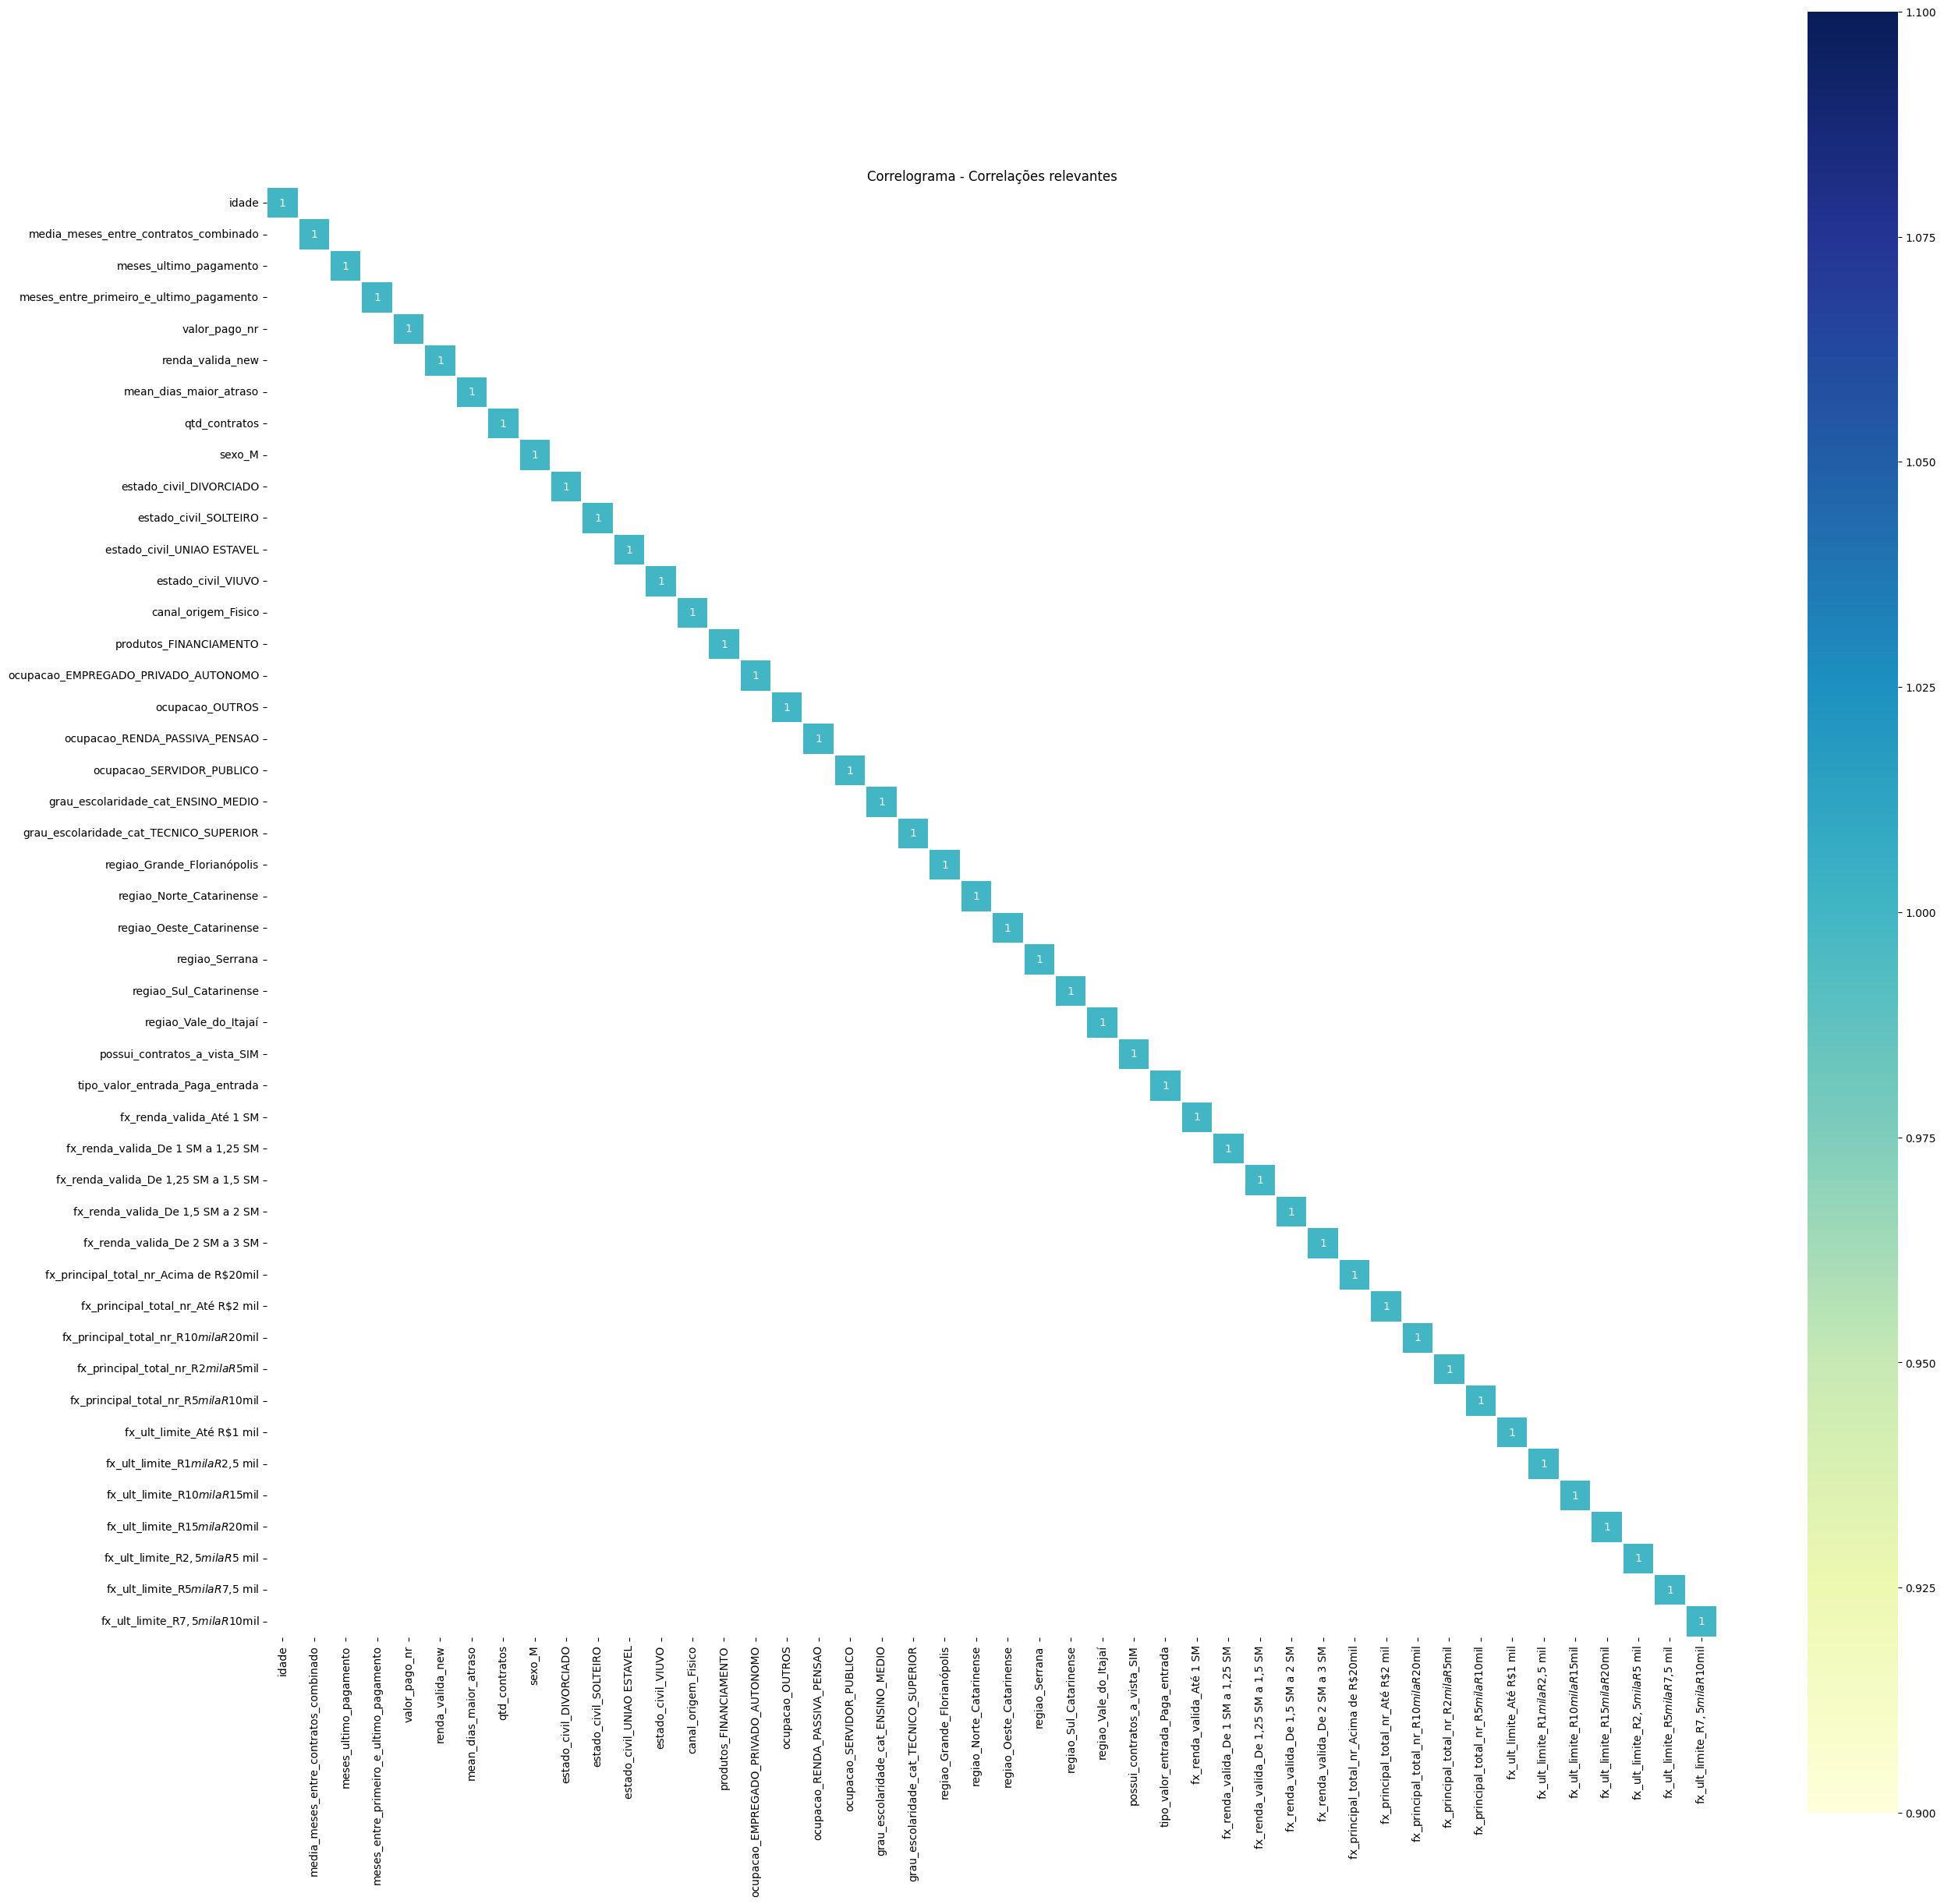

In [ ]:
# Correlação
corr=X_train_d_select.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
w=h=30
plot.figure(figsize=(h,w))
sns.heatmap(corr,mask=mask,vmax=1.0,linewidths=0.01,
           square=True, annot=True,cmap='YlGnBu', linecolor='white')
plot.title('Correlograma')
plot.show

# Correlações relevantes
mask = np.abs(corr) >= 0.75
filtro_corr = corr.where(mask)

plot.figure(figsize=(h,w))
sns.heatmap(filtro_corr, vmax=1.0, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', linecolor='white')
plot.title('Correlograma - Correlações relevantes')
plot.show()

In [ ]:
# Assimetria
skewed_feats=X_train_d_select.apply(lambda x: skew(x.dropna()))
print(skewed_feats.sort_values(ascending=False))

regiao_Oeste_Catarinense                    9.07
ocupacao_OUTROS                             6.08
regiao_Serrana                              5.35
fx_ult_limite_R$15 mil a R$20mil            5.19
fx_principal_total_nr_Acima de R$20mil      5.12
ocupacao_SERVIDOR_PUBLICO                   4.47
fx_ult_limite_Até R$1 mil                   4.47
valor_pago_nr                               4.29
ocupacao_RENDA_PASSIVA_PENSAO               4.17
possui_contratos_a_vista_SIM                4.12
qtd_contratos                               3.96
grau_escolaridade_cat_TECNICO_SUPERIOR      3.62
estado_civil_VIUVO                          3.37
renda_valida_new                            3.37
estado_civil_DIVORCIADO                     3.30
fx_renda_valida_De 2 SM a 3 SM              3.24
fx_renda_valida_Até 1 SM                    2.91
estado_civil_UNIAO ESTAVEL                  2.77
fx_principal_total_nr_R$10 mil a R$20mil    2.42
media_meses_entre_contratos_combinado       2.31
fx_ult_limite_R$1 mi

In [ ]:
# Variancia Nula
constant_features=[feat for feat in X_train_d_select.columns if X_train_d_select[feat].std()==0]
constant_features

[]

In [ ]:
X_train_d_select.head(5)

,idade,media_meses_entre_contratos_combinado,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,valor_pago_nr,renda_valida_new,mean_dias_maior_atraso,qtd_contratos,sexo_M,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,canal_origem_Fisico,produtos_FINANCIAMENTO,ocupacao_EMPREGADO_PRIVADO_AUTONOMO,ocupacao_OUTROS,ocupacao_RENDA_PASSIVA_PENSAO,ocupacao_SERVIDOR_PUBLICO,grau_escolaridade_cat_ENSINO_MEDIO,grau_escolaridade_cat_TECNICO_SUPERIOR,regiao_Grande_Florianópolis,regiao_Norte_Catarinense,regiao_Oeste_Catarinense,regiao_Serrana,regiao_Sul_Catarinense,regiao_Vale_do_Itajaí,possui_contratos_a_vista_SIM,tipo_valor_entrada_Paga_entrada,fx_renda_valida_Até 1 SM,"fx_renda_valida_De 1 SM a 1,25 SM","fx_renda_valida_De 1,25 SM a 1,5 SM","fx_renda_valida_De 1,5 SM a 2 SM",fx_renda_valida_De 2 SM a 3 SM,fx_principal_total_nr_Acima de R$20mil,fx_principal_total_nr_Até R$2 mil,fx_principal_total_nr_R$10 mil a R$20mil,fx_principal_total_nr_R$2 mil a R$5mil,fx_principal_total_nr_R$5 mil a R$10mil,fx_ult_limite_Até R$1 mil,"fx_ult_limite_R$1 mil a R$2,5 mil",fx_ult_limite_R$10 mil a R$15mil,fx_ult_limite_R$15 mil a R$20mil,"fx_ult_limite_R$2,5 mil a R$5 mil","fx_ult_limite_R$5 mil a R$7,5 mil","fx_ult_limite_R$7,5 mil a R$10mil"
0,47,2,6,26,8737,1617,8,8,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,42,0,10,29,5534,1940,26,10,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,43,0,1,7,2437,5000,2,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,59,0,30,5,0,1730,31,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,38,0,19,1,261,3000,3,3,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Normalização
# Padronização dos dados de treino

num_cols = ['idade',
 #'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 #'qtd_contratos_fechado_regular',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 #"limite_total_ultimo_mes"
 ]

# Inicializa o scaler
scaler = StandardScaler()

# Ajusta e transforma os dados de treino
X_train_d_select[num_cols] = pd.DataFrame(
    scaler.fit_transform(X_train_d_select[num_cols]),
    columns=num_cols,
    index=X_train_d_select.index
)
## Valores da padronização são obtidos em relação ao dados de treino

C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_4612\3988353938.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_d_select[num_cols] = pd.DataFrame(


In [ ]:
## Salvando a normalizador como pickle
#joblib.dump(scaler, 'scaler_num.pkl')

['scaler_num.pkl']

In [ ]:
X_train_d_select.head(5)

,idade,media_meses_entre_contratos_combinado,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,valor_pago_nr,renda_valida_new,mean_dias_maior_atraso,qtd_contratos,sexo_M,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,canal_origem_Fisico,produtos_FINANCIAMENTO,ocupacao_EMPREGADO_PRIVADO_AUTONOMO,ocupacao_OUTROS,ocupacao_RENDA_PASSIVA_PENSAO,ocupacao_SERVIDOR_PUBLICO,grau_escolaridade_cat_ENSINO_MEDIO,grau_escolaridade_cat_TECNICO_SUPERIOR,regiao_Grande_Florianópolis,regiao_Norte_Catarinense,regiao_Oeste_Catarinense,regiao_Serrana,regiao_Sul_Catarinense,regiao_Vale_do_Itajaí,possui_contratos_a_vista_SIM,tipo_valor_entrada_Paga_entrada,fx_renda_valida_Até 1 SM,"fx_renda_valida_De 1 SM a 1,25 SM","fx_renda_valida_De 1,25 SM a 1,5 SM","fx_renda_valida_De 1,5 SM a 2 SM",fx_renda_valida_De 2 SM a 3 SM,fx_principal_total_nr_Acima de R$20mil,fx_principal_total_nr_Até R$2 mil,fx_principal_total_nr_R$10 mil a R$20mil,fx_principal_total_nr_R$2 mil a R$5mil,fx_principal_total_nr_R$5 mil a R$10mil,fx_ult_limite_Até R$1 mil,"fx_ult_limite_R$1 mil a R$2,5 mil",fx_ult_limite_R$10 mil a R$15mil,fx_ult_limite_R$15 mil a R$20mil,"fx_ult_limite_R$2,5 mil a R$5 mil","fx_ult_limite_R$5 mil a R$7,5 mil","fx_ult_limite_R$7,5 mil a R$10mil"
0,-0.22,-0.33,-0.25,0.59,0.41,-0.60,0.05,0.58,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,-0.53,-0.72,0.12,0.82,-0.01,-0.19,1.86,0.94,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,-0.46,-0.72,-0.71,-0.88,-0.42,3.65,-0.55,-0.66,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0.53,-0.72,1.97,-1.04,-0.74,-0.46,2.37,-0.66,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.77,-0.72,0.95,-1.35,-0.71,1.14,-0.45,-0.30,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


<Axes: >

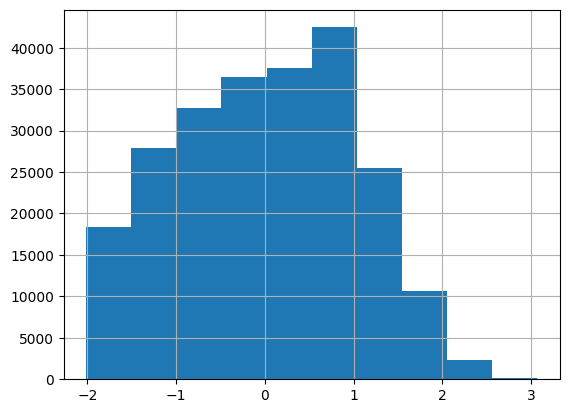

In [ ]:
X_train_d_select.idade.hist()

<Axes: >

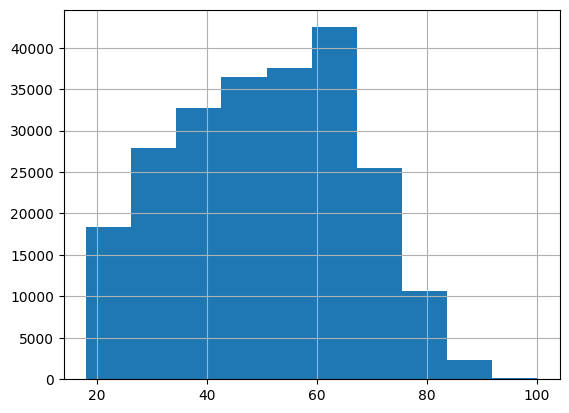

In [ ]:
X_train_dummy.idade.hist()

In [ ]:
# LASSO
# Hiperparêmetros
param_grid = {'alpha': [0.0001,0.001]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso(max_iter=10000)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=cv)
grid.fit(X_train_d_select, y_train)

# Melhor modelo
melhor_modelo_lasso = grid.best_estimator_

In [ ]:
grid.best_estimator_

Lasso(alpha=0.0001, max_iter=10000)

Importância das variáveis no treino:
fx_ult_limite_Até R$1 mil                  0.26
produtos_FINANCIAMENTO                     0.20
fx_ult_limite_R$1 mil a R$2,5 mil          0.13
meses_ultimo_pagamento                     0.12
canal_origem_Fisico                        0.11
fx_principal_total_nr_R$5 mil a R$10mil    0.10
qtd_contratos                              0.10
regiao_Norte_Catarinense                   0.09
regiao_Sul_Catarinense                     0.09
regiao_Grande_Florianópolis                0.09
regiao_Oeste_Catarinense                   0.09
regiao_Vale_do_Itajaí                      0.08
mean_dias_maior_atraso                     0.08
fx_principal_total_nr_R$2 mil a R$5mil     0.07
regiao_Serrana                             0.07
fx_principal_total_nr_R$10 mil a R$20mil   0.07
possui_contratos_a_vista_SIM               0.07
fx_ult_limite_R$7,5 mil a R$10mil          0.05
valor_pago_nr                              0.04
fx_ult_limite_R$2,5 mil a R$5 mil          0.04
tip

<Axes: title={'center': 'Importancia das variáveis no modelo LASSO'}>

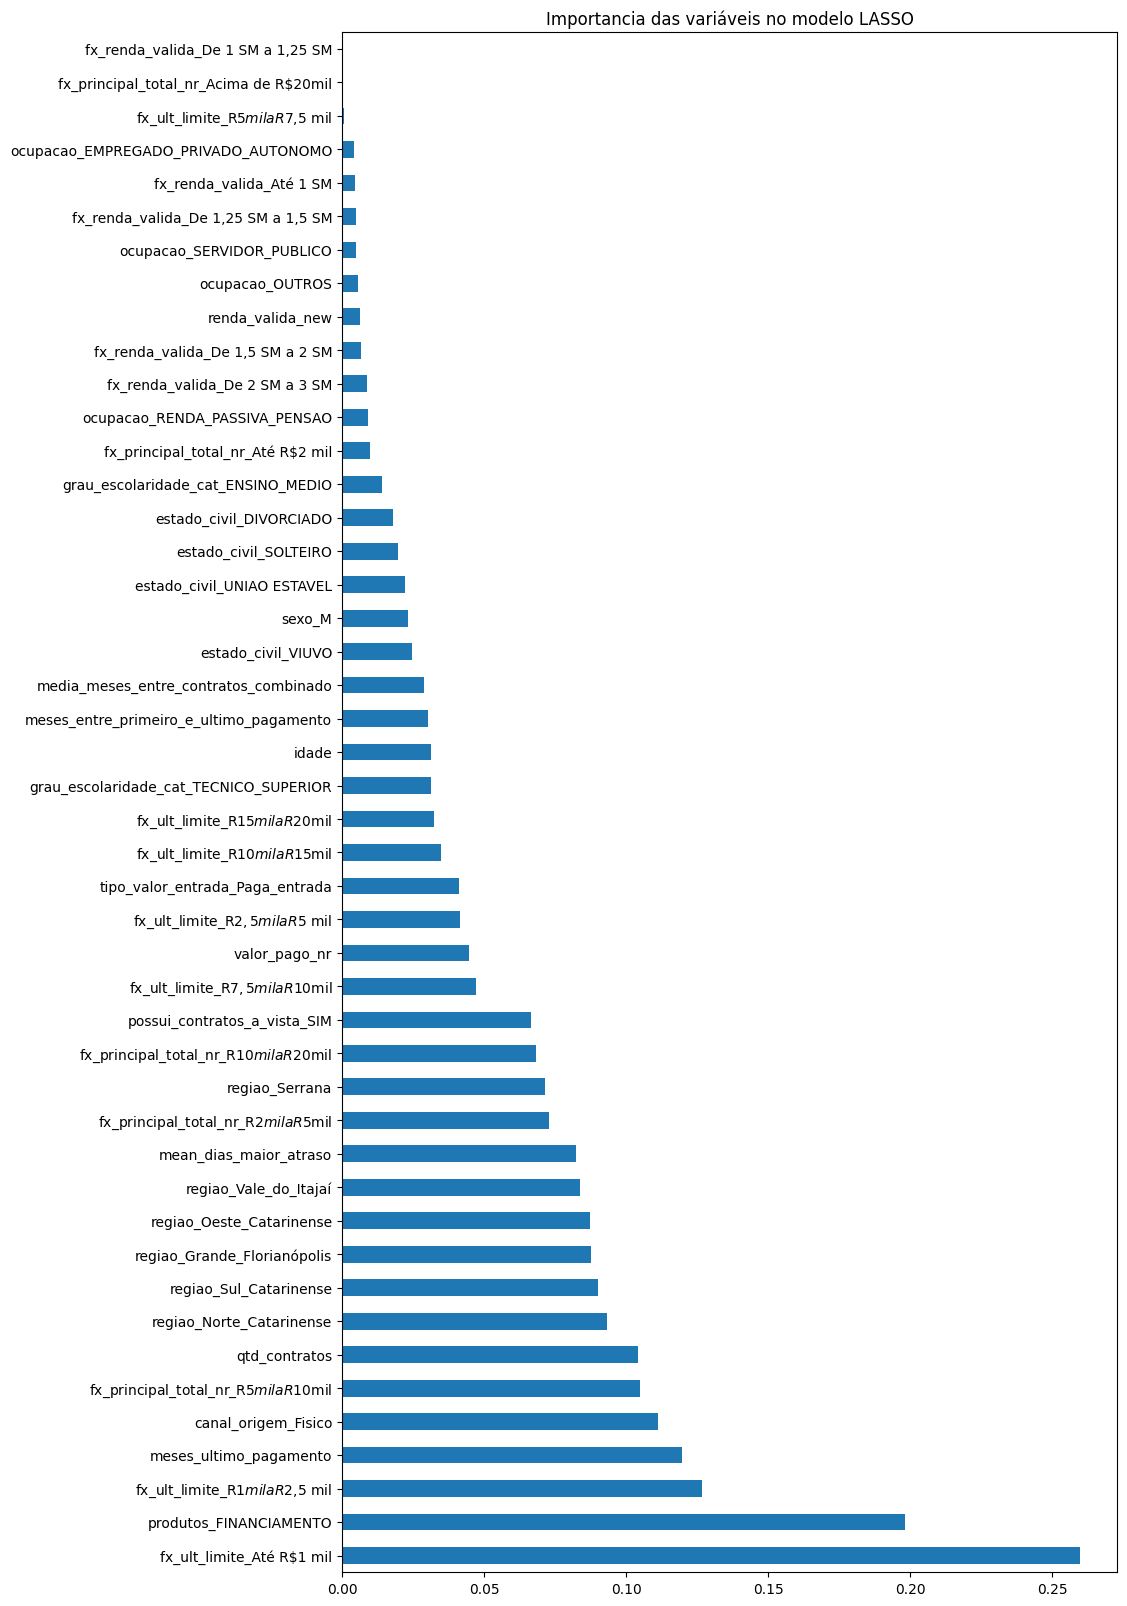

In [ ]:
lasso_coef = pd.Series(melhor_modelo_lasso.coef_, index=X_train_d_select.columns)
importancia = lasso_coef.abs().sort_values(ascending=False)
print("Importância das variáveis no treino:")
print(importancia)
importancia.head(68).plot(kind='barh', figsize=(10, 20), title="Importancia das variáveis no modelo LASSO")


In [ ]:
''''# Balanceamento dos dados

# Superamostragem da minoria
over = SVMSMOTE(sampling_strategy=0.5, random_state=2025)
X_over, y_over = over.fit_resample(X_train_d_select, y_train)

# Subamostragem da maioria
under = RandomUnderSampler(sampling_strategy=0.6, random_state=2025)
X_final, y_final = under.fit_resample(X_over, y_over)'''

"'# Balanceamento dos dados\n\n# Superamostragem da minoria\nover = SVMSMOTE(sampling_strategy=0.5, random_state=2025)\nX_over, y_over = over.fit_resample(X_train_d_select, y_train)\n\n# Subamostragem da maioria\nunder = RandomUnderSampler(sampling_strategy=0.6, random_state=2025)\nX_final, y_final = under.fit_resample(X_over, y_over)"

In [ ]:
'''# Verificando a distribuição das classes após o balanceamento
print("Antes do balanceamento:", y_train.value_counts())
print("Após Superamostragem:", y_over.value_counts())
print("Após Subamostragem:", y_final.value_counts())'''
X_final, y_final=X_train_d_select, y_train

In [ ]:
X_final.columns.to_list()

['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'produtos_FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_pr

### Base de teste - Pré processamento

In [ ]:
df_test=pd.read_csv("C:/Users/fernando.monteiro/deep-torch-example/KAB/Behavior_KAB/Desenvolvimento/Cluster/df_test.csv", sep=",", header=0, index_col=None)
X_test=df_test.copy()

In [ ]:
# Amostragem
#Variável de interesse
y_test = X_test >> select(X.inad_e_reneg)

# Remover a variável resposta do conjunto de dados
X_test.drop(['inad_e_reneg'],axis=1, inplace=True)
# Frequência da variável target no treino
print(y_test.value_counts()) #qtd treino

inad_e_reneg
0               70706
1               29583
Name: count, dtype: int64


In [ ]:
ids_test = X_test["cpf_cnpj"]  
X_test = X_test.drop(columns=["cpf_cnpj"])

In [ ]:
# one hot encoding 
X_test_dummy = pd.get_dummies(X_test, drop_first=True).astype(int)
X_test_dummy = X_test_dummy.reindex(columns=X_train_dummy.columns, fill_value=0)

In [ ]:
# Seleção de variáveis
X_test_d_select = X_test_dummy.reindex(columns=X_train_d_select.columns, fill_value=0)

In [ ]:
## conjunto de teste - precisa ser o modelo que treinado para evitar vazamento de informação
X_test_d_select[num_cols] = pd.DataFrame(
    scaler.transform(X_test_d_select[num_cols]),
    columns=num_cols,
    index=X_test_d_select.index
)

# Modelos de Machine Learning

#### XGBoost

In [ ]:
#modelo

# Criando um modelo XGBoost
xgb_model = XGBClassifier(
    objective="binary:logistic",  # binária
    eval_metric="logloss",        # métrica de erro logístico — comum em classificação
    use_label_encoder=False,      # desativar aviso de codificação depreciada
    random_state=2025             # Semente
    )

# GridSearch
parameters = {
    'learning_rate': [0.05, 0.1, 0.2],  # Controla o quanto cada árvore contribui para o modelo final. Taxas menores tornam o aprendizado mais lento, mas potencialmente mais preciso
    'max_depth': [2,3,4,5,6,7,8,9,10],  # Define o quão profunda cada árvore de decisão pode ser. Controla a complexidade do modelo
    'min_child_weight': [1, 2, 3],      # Determina o mínimo de "peso" (número de amostras ponderadas) necessário para que uma divisão ocorra em uma árvore
    'subsample': [0.6, 0.8, 1.0],       # Porcentagem das amostras usadas para treinar cada árvore
    'colsample_bytree': [0.6, 0.8, 1.0],# Porcentagem das colunas (variáveis) usadas ao construir cada árvore.
    'n_estimators': [100, 200]          # Número de árvores.
}

xgb_grid = GridSearchCV(
    xgb_model,
    parameters,
    scoring='roc_auc',  # métrica comum para classificação binária
    cv=5,               # Significado: Usa validação cruzada com 5 folds (partições)
    n_jobs=5,           # Define o número de processos paralelos usados durante a busca
    verbose=1,           # Mostra o progresso da busca no terminal.
)

# RandomizedSearchCV
param_dists = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2,3,4,5,6,7,8,9,10],  
    'min_child_weight': [1,2,3,4,5,10,15,20],   
    "gamma": [0.5,1,2,3,4,5],
    'subsample': [0.6, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8, 0.9],
    'n_estimators': [100, 200, 300],    
}

xgb_rand = RandomizedSearchCV(
    xgb_model,
    param_dists,
    scoring='roc_auc',  # métrica comum para classificação binária
    cv=5,               # Significado: Usa validação cruzada com 5 folds (partições)
    n_jobs=5,           # Define o número de processos paralelos usados durante a busca
    verbose=1,           # Mostra o progresso da busca no terminal.
    random_state=2025   
)

In [ ]:
X_final_xgb=X_final[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 #'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr', # Voltar e analisar
 #'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 #'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 #'estado_civil_UNIAO ESTAVEL',
 #'estado_civil_VIUVO',
 'canal_origem_Fisico', # Voltar e analisar
 #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 #'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 #'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 #'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
# 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 # 'fx_ult_limite_Até R$1 mil',
 #'fx_ult_limite_R$1 mil a R$2,5 mil',
 #'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 #'fx_ult_limite_R$5 mil a R$7,5 mil',
 #'fx_ult_limite_R$7,5 mil a R$10mil',
 'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil',
 ]]

In [ ]:
#xgb_grid.fit(X_final, y_final)

In [ ]:
#xgb_rand.fit(X_final_xgb, y_final)

In [ ]:
#xgb = xgb_grid.best_estimator_
#xgb = xgb_rand.best_estimator_
#xgb

In [ ]:
#########################
# Bayesian Optimization #
#########################
# 1. Função objetivo
def xgb_cv(learning_rate, max_depth, min_child_weight, gamma,
           subsample, colsample_bytree, n_estimators,reg_alpha,reg_lambda):

    # modelo base
    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=int(max_depth),  # precisa ser int
        min_child_weight=int(min_child_weight),
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=int(n_estimators),
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        objective="binary:logistic",
        n_jobs=5,
        random_state=2025,
        eval_metric="auc"
    )
    
    # validação cruzada
    auc = cross_val_score(model, X_final_xgb, y_final,
                          scoring="roc_auc", cv=5).mean()
    return auc

# 2. Espaço de busca
pbounds = {
    'learning_rate': (0.05, 0.2),
    'max_depth': (2,5),
    'min_child_weight': (1,20),
    "gamma": (0.5,5),
    'subsample': (0.6, 0.9),
    'colsample_bytree': (0.6, 0.9),
    'n_estimators': (100,300),
    "reg_alpha": (0,10),
    "reg_lambda": (0,20)
}

# 3. Rodando o Bayesian Optimization
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=pbounds,
    random_state=2025,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=15)


In [ ]:
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])
best_params['n_estimators'] = int(best_params['n_estimators'])
xgb = XGBClassifier(
    objective="binary:logistic",
    n_jobs=5,
    random_state=2025,
    eval_metric="auc",
    **best_params
)
xgb.fit(X_final_xgb, y_final)

In [ ]:
joblib.dump(xgb, "xgb_6.pkl")

In [ ]:
# quais as caracteristicas mais importantes para definir a inadimplência?
importancias = xgb.feature_importances_
nomes_variaveis = X_final_xgb.columns

df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias
})

# Ordenar por importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)
print(df_importancia)

                                    Variável  Importância
28    fx_principal_total_nr_R$2 mil a R$5mil         0.13
5                              qtd_contratos         0.10
4                     mean_dias_maior_atraso         0.09
3                              valor_pago_nr         0.08
2                     meses_ultimo_pagamento         0.08
26         fx_principal_total_nr_Até R$2 mil         0.06
1      media_meses_entre_contratos_combinado         0.06
8                        canal_origem_Fisico         0.06
25    fx_principal_total_nr_Acima de R$20mil         0.05
29   fx_principal_total_nr_R$5 mil a R$10mil         0.04
27  fx_principal_total_nr_R$10 mil a R$20mil         0.03
0                                      idade         0.03
18           tipo_valor_entrada_Paga_entrada         0.03
17              possui_contratos_a_vista_SIM         0.02
24         fx_ult_limite_R$2,5 mil a R$5 mil         0.02
15                            regiao_Serrana         0.01
7             

#### Regressão Logística

In [ ]:
logistico_model = LogisticRegression(class_weight ='balanced',
                                     penalty="l1",      # Lasso
                                     solver="liblinear",# necessário para L1
                                     max_iter=5000,
                                     random_state=2025) 
# Tentar com LASSO
# Valida cruzada estratificada com 10 folds e 3 repetições
cv = RepeatedStratifiedKFold(n_splits=10, # Os dados serão divididos em n partes (folds)
                             n_repeats=10, # O processo será repetido n vezes, cada vez com uma divisão diferente
                             random_state=2025
                             )

# Grid para o LASSO
param_grid = {
    "C": [0.001, 0.01] 
}

# GridSearch
logistico_model_grid = GridSearchCV(
    estimator=logistico_model,
    param_grid=param_grid,
    scoring="roc_auc",  # métrica de avaliação
    cv=cv,
    n_jobs=-1
)

In [ ]:
# step back com regiao
X_final_rl=X_final[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 #'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr', # Voltar e analisar
 #'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 #'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 #'estado_civil_UNIAO ESTAVEL',
 #'estado_civil_VIUVO',
 'canal_origem_Fisico', # Voltar e analisar
 #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 #'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 #'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 #'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
# 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 # 'fx_ult_limite_Até R$1 mil',
 #'fx_ult_limite_R$1 mil a R$2,5 mil',
 #'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 #'fx_ult_limite_R$5 mil a R$7,5 mil',
 #'fx_ult_limite_R$7,5 mil a R$10mil',
 'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil',
 ]]

# step back com regiao
selected_features=['idade', 'media_meses_entre_contratos_combinado', 'meses_ultimo_pagamento', 'valor_pago_nr', 'mean_dias_maior_atraso', 'qtd_contratos', 'sexo_M', 'canal_origem_Fisico', 'possui_contratos_a_vista_SIM', 'tipo_valor_entrada_Paga_entrada', 'fx_principal_total_nr_Acima de R$20mil', 'fx_principal_total_nr_Até R$2 mil', 'fx_principal_total_nr_R$10 mil a R$20mil', 'fx_principal_total_nr_R$2 mil a R$5mil', 'fx_principal_total_nr_R$5 mil a R$10mil']
X_train_selected = X_final_rl[selected_features]

In [ ]:
#logistico_model_grid.fit(X_final_rl, y_final)
#logistico_model = logistico_model_grid.best_estimator_

In [ ]:
#logistico_model

In [ ]:
# StepWise

log_reg = LogisticRegression(max_iter=1000,class_weight ='balanced', solver='liblinear')


# stepwise forward selection
sfs = SequentialFeatureSelector(
    log_reg,
    n_features_to_select="auto",   # ou um número fixo
    direction="forward",           
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

sfs.fit(X_final_rl, y_final)

In [ ]:
# variáveis escolhidas
selected_features = X_final_rl.columns[sfs.get_support()]
print("Variáveis selecionadas:", list(selected_features))

In [ ]:
# reduzindo X_train e X_test
X_train_selected = X_final_rl[selected_features]

# ajusta o modelo final
logistico_model.fit(X_train_selected, y_final)

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=5000, penalty='l1',
                   random_state=2025, solver='liblinear')

In [ ]:
joblib.dump(logistico_model, "log_6.pkl")

['log_6.pkl']

In [ ]:
# Qual o efeito das caracteristicas sobre a inadimplência?
coef_df = pd.DataFrame({
    'Variável': X_train_selected.columns,
    'Coeficiente': logistico_model.coef_[0],
    'Odds Ratio': np.exp(logistico_model.coef_[0])
}).sort_values(by='Coeficiente', ascending=False)
print(coef_df)

                                    Variável  Coeficiente  Odds Ratio
5                              qtd_contratos         0.93        2.54
2                     meses_ultimo_pagamento         0.73        2.08
4                     mean_dias_maior_atraso         0.61        1.84
6                                     sexo_M         0.15        1.17
3                              valor_pago_nr        -0.28        0.76
1      media_meses_entre_contratos_combinado        -0.34        0.71
0                                      idade        -0.37        0.69
14   fx_principal_total_nr_R$5 mil a R$10mil        -0.41        0.66
9            tipo_valor_entrada_Paga_entrada        -0.44        0.64
8               possui_contratos_a_vista_SIM        -0.49        0.61
13    fx_principal_total_nr_R$2 mil a R$5mil        -0.50        0.61
11         fx_principal_total_nr_Até R$2 mil        -0.74        0.48
12  fx_principal_total_nr_R$10 mil a R$20mil        -0.83        0.44
7                   

In [ ]:
'''X_final_2=X_final[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 #'meses_entre_primeiro_e_ultimo_pagamento',
 #'valor_pago_nr', # Voltar e analisar
 #'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 #'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 #'estado_civil_UNIAO ESTAVEL',
 #'estado_civil_VIUVO',
# 'canal_origem_Fisico', # Voltar e analisar
 #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 #'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 #'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 #'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 # 'fx_ult_limite_Até R$1 mil',
 #'fx_ult_limite_R$1 mil a R$2,5 mil',
 #'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 #'fx_ult_limite_R$5 mil a R$7,5 mil',
 #'fx_ult_limite_R$7,5 mil a R$10mil',
'fx_principal_total_Até R$1 mil',
'fx_principal_total_R$1 mil a R$2,5 mil',
'fx_principal_total_R$10 mil a R$15mil',
'fx_principal_total_R$15 mil a R$20mil',
'fx_principal_total_R$2,5 mil a R$5 mil',
'fx_principal_total_R$5 mil a R$7,5 mil',
'fx_principal_total_R$7,5 mil a R$10mil'
 ]]
X_const = sm.add_constant(X_final_2)
modelo_logit = sm.Logit(y_final, X_const)
resultado = modelo_logit.fit()
print(resultado.summary())'''

"X_final_2=X_final[['idade',\n 'media_meses_entre_contratos_combinado',\n 'meses_ultimo_pagamento',\n #'meses_entre_primeiro_e_ultimo_pagamento',\n #'valor_pago_nr', # Voltar e analisar\n #'renda_valida_new',\n 'mean_dias_maior_atraso',\n 'qtd_contratos',\n 'sexo_M',\n #'estado_civil_DIVORCIADO',\n 'estado_civil_SOLTEIRO',\n #'estado_civil_UNIAO ESTAVEL',\n #'estado_civil_VIUVO',\n# 'canal_origem_Fisico', # Voltar e analisar\n #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',\n #'ocupacao_OUTROS',\n 'ocupacao_RENDA_PASSIVA_PENSAO',\n 'ocupacao_SERVIDOR_PUBLICO',\n 'grau_escolaridade_cat_ENSINO_MEDIO',\n 'grau_escolaridade_cat_TECNICO_SUPERIOR',\n 'regiao_Grande_Florianópolis',\n 'regiao_Norte_Catarinense',\n #'regiao_Oeste_Catarinense',\n 'regiao_Serrana',\n 'regiao_Sul_Catarinense',\n #'regiao_Vale_do_Itajaí',\n 'possui_contratos_a_vista_SIM',\n 'tipo_valor_entrada_Paga_entrada',\n 'fx_renda_valida_Até 1 SM',\n 'fx_renda_valida_De 1 SM a 1,25 SM',\n 'fx_renda_valida_De 1,25 SM a 1,5 SM',\n 'fx_

#### Floresta Aleatória

In [ ]:
# Criando um modelo de Floresta Aleatória
floresta_model = RandomForestClassifier(
    criterion="log_loss",       
    random_state=2025  
    )

# GridSearch
params={
    'max_depth':[2,3,4,5,6,7,8,9,10],
    'class_weight': ['balanced'],
    'min_samples_split': [2, 4, 8, 10, 20],     
    'max_samples': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]   
}

floresta_grid = GridSearchCV(
    floresta_model,
    params,
    scoring='roc_auc', 
    cv=5,            
    n_jobs=5,          
    verbose=1,          
)

# RandomizedSearchCV
param_dists={
    'max_depth':[2,3,4,5,6,7,8,9,10],
    'class_weight': ['balanced'],
    'min_samples_split': [2, 4, 8, 10, 20],     
    'max_samples': [0.6, 0.8, 0.9],
    'n_estimators': [100, 200, 300]   
}

floresta_rand = RandomizedSearchCV(
    floresta_model,
    params,
    scoring='roc_auc', 
    cv=5,            
    n_jobs=5,          
    verbose=1,      
    random_state=2025      
)

In [ ]:
X_final_fa=X_final[['idade', 
 'canal_origem_Fisico', 
 'media_meses_entre_contratos_combinado', 
 'meses_ultimo_pagamento', 
 'meses_entre_primeiro_e_ultimo_pagamento', 
 'valor_pago_nr',
 'mean_dias_maior_atraso', 
 'qtd_contratos', 
 'sexo_M', 
 'produtos_FINANCIAMENTO', 
 'grau_escolaridade_cat_TECNICO_SUPERIOR', 
 'possui_contratos_a_vista_SIM', 
 'tipo_valor_entrada_Paga_entrada', 
 'fx_ult_limite_Até R$1 mil', 
 'fx_ult_limite_R$1 mil a R$2,5 mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil', 
 'fx_ult_limite_R$5 mil a R$7,5 mil']]

In [ ]:
#floresta_grid.fit(X_final, y_final)

In [ ]:
#floresta_rand.fit(X_final_fa, y_final)

In [ ]:
#floresta = floresta_grid.best_estimator_
#floresta = floresta_rand.best_estimator_
#floresta

In [ ]:
#########################
# Bayesian Optimization #
#########################
# 1. Função objetivo
def fa_cv(max_depth, n_estimators,max_samples,min_samples_split):

    # modelo base
    model = RandomForestClassifier(
        max_depth=int(max_depth),  # precisa ser int
        n_estimators=int(n_estimators),
        criterion="log_loss",       
        class_weight= 'balanced',
        n_jobs=5,
        max_samples=max_samples,
        min_samples_split=int(min_samples_split),
        random_state=2025,
    )
    
    # validação cruzada
    auc = cross_val_score(model, X_final_fa, y_final.values.ravel(),
                          scoring="roc_auc", cv=5).mean()
    return auc

# 2. Espaço de busca (equivalente ao param_dists)
pbounds = {
    'max_depth': (2,10),
    'min_samples_split': (2, 20),     
    'max_samples': (0.6, 0.9),
    'n_estimators': (100,300),

}

# 3. Rodando o Bayesian Optimization
optimizer = BayesianOptimization(
    f=fa_cv,
    pbounds=pbounds,
    random_state=2025,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=15)

KeyboardInterrupt: 

In [ ]:
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])
best_params['n_estimators'] = int(best_params['n_estimators'])
floresta = RandomForestClassifier(
        criterion="log_loss",       
        class_weight= 'balanced',
        n_jobs=5,
        random_state=2025,
        **best_params

    )
floresta.fit(X_final_fa, y_final)

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, max_samples=np.float64(0.7376519555948069),
                       min_samples_split=14, n_estimators=213, n_jobs=5,
                       random_state=2025)

In [ ]:
joblib.dump(floresta, "fa_7.pkl")

['fa_6.pkl']

In [ ]:
'''plot.figure(figsize=(20, 10))
plot_tree(floresta.estimators_[20], filled=True, feature_names=X_final.columns)
plot.show()'''

'plot.figure(figsize=(20, 10))\nplot_tree(floresta.estimators_[20], filled=True, feature_names=X_final.columns)\nplot.show()'

In [ ]:
# quais as caracteristicas mais importantes para definir a inadimplência?
importancias_floresta = floresta.feature_importances_
nomes_variaveis = X_final_fa.columns

df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias_floresta
})

# Ordenar por importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)
print(df_importancia)

                                    Variável  Importância
3                              valor_pago_nr         0.21
2                     meses_ultimo_pagamento         0.20
4                     mean_dias_maior_atraso         0.17
5                              qtd_contratos         0.16
1      media_meses_entre_contratos_combinado         0.09
0                                      idade         0.05
8                        canal_origem_Fisico         0.03
28    fx_principal_total_nr_R$2 mil a R$5mil         0.02
26         fx_principal_total_nr_Até R$2 mil         0.02
18           tipo_valor_entrada_Paga_entrada         0.01
24         fx_ult_limite_R$2,5 mil a R$5 mil         0.01
29   fx_principal_total_nr_R$5 mil a R$10mil         0.01
27  fx_principal_total_nr_R$10 mil a R$20mil         0.01
7                      estado_civil_SOLTEIRO         0.01
17              possui_contratos_a_vista_SIM         0.00
25    fx_principal_total_nr_Acima de R$20mil         0.00
6             

# Comparação de modelos

In [ ]:
X_test_xgb=X_test_d_select[X_final_xgb.columns]
X_test_rl=X_test_d_select[X_train_selected.columns]
X_test_fa=X_test_d_select[X_final_fa.columns]

In [ ]:
xgb = joblib.load("C:/Users/fernando.monteiro/deep-torch-example/KAB/Behavior_KAB/Modelos/xgb_6.pkl")
logistico_model = joblib.load("C:/Users/fernando.monteiro/deep-torch-example/KAB/Behavior_KAB/Modelos/log_6.pkl")
floresta = joblib.load("C:/Users/fernando.monteiro/deep-torch-example/KAB/Behavior_KAB/Modelos/fa.pkl")
previsao_xgb = xgb.predict(X_test_xgb)
previsao_logistico = logistico_model.predict(X_test_rl)
previsao_floresta= floresta.predict(X_test_fa)

In [ ]:
# Matriz de confusão
# Rótulos das classes
labels = [0, 1]
cm_xgb = confusion_matrix(y_test, previsao_xgb,labels=labels)
cm_logistico = confusion_matrix(y_test, previsao_logistico,labels=labels)
cm_floresta = confusion_matrix(y_test, previsao_floresta,labels=labels)

In [ ]:
# Matriz de confusão bonitinha
# Minimizar o Erro do tipo I: Classificar um cliente bom como ruim é maximizar a especificidade
# Minimizar o Erro do tipo II: Classificar um cliente ruim como bom é maximizar o recall/Sensibilidade

# XGB
cm_xgb_df = pd.DataFrame(cm_xgb, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_xgb_df['Total Linha'] = cm_xgb_df.sum(axis=1)
cm_xgb_df.loc['Total Coluna'] = cm_xgb_df.sum()

# Cálculo de métricas
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
especificidade_xgb = tn_xgb / (tn_xgb + fp_xgb)
vpn_xgb = tn_xgb / (tn_xgb + fn_xgb)
recall_xgb = recall_score(y_test, previsao_xgb)
media_rec_spec_xgb = np.sqrt(recall_xgb * especificidade_xgb)

# Logistica
cm_logistico_df = pd.DataFrame(cm_logistico, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_logistico_df['Total Linha'] = cm_logistico_df.sum(axis=1)
cm_logistico_df.loc['Total Coluna'] = cm_logistico_df.sum()

# Cálculo de métricas
tn_log, fp_log, fn_log, tp_log = cm_logistico.ravel()
especificidade_log = tn_log / (tn_log + fp_log)
vpn_log = tn_log / (tn_log + fn_log)
recall_log = recall_score(y_test, previsao_logistico)
media_rec_spec_log = np.sqrt(recall_log * especificidade_log)

# Floresta Aleatória
cm_floresta_df = pd.DataFrame(cm_floresta, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_floresta_df['Total Linha'] = cm_floresta_df.sum(axis=1)
cm_floresta_df.loc['Total Coluna'] = cm_floresta_df.sum()

# Cálculo de métricas
tn_fa, fp_fa, fn_fa, tp_fa = cm_floresta.ravel()
especificidade_fa = tn_fa / (tn_fa + fp_fa)
vpn_fa = tn_fa / (tn_fa + fn_fa)
recall_fa = recall_score(y_test, previsao_floresta)
media_rec_spec_fa = np.sqrt(recall_fa * especificidade_fa)

print("Matriz de Confusão XGB:\n", cm_xgb_df)
print("Matriz de Confusão Logística:\n", cm_logistico_df)
print("Matriz de Confusão Floresta Aleatória:\n", cm_floresta_df)

Matriz de Confusão XGB:
               Previsto 0  Previsto 1  Total Linha
Real 0             62857        7849        70706
Real 1             10274       19309        29583
Total Coluna       73131       27158       100289
Matriz de Confusão Logística:
               Previsto 0  Previsto 1  Total Linha
Real 0             41958       28748        70706
Real 1              3972       25611        29583
Total Coluna       45930       54359       100289
Matriz de Confusão Floresta Aleatória:
               Previsto 0  Previsto 1  Total Linha
Real 0             56419       14287        70706
Real 1              4609       24974        29583
Total Coluna       61028       39261       100289


In [ ]:
#print(classification_report(previsao_xgb, y_test))

In [ ]:
#print(classification_report(previsao_logistico, y_test))

In [ ]:
#print(classification_report(previsao_floresta, y_test))

In [ ]:
import builtins

# Montar um dicionário com os resultados
resultados = {
    "Modelo": ["XGB", "Logística", "Floresta"],
    "VN": [
        tn_xgb,
        tn_log,
        tn_fa
    ],
    "FP": [
        fp_xgb,
        fp_log,
        fp_fa
    ],
    "FN": [
        fn_xgb,
        fn_log,
        fn_fa
    ],
    "VP": [
        tp_xgb,
        tp_log,
        tp_fa
    ],
    "Acurácia": [
        builtins.round(accuracy_score(y_test, previsao_xgb), 4),
        builtins.round(accuracy_score(y_test, previsao_logistico), 4),
        builtins.round(accuracy_score(y_test, previsao_floresta), 4)
    ],
    "AUC": [
        builtins.round(roc_auc_score(y_test, previsao_xgb), 4),
        builtins.round(roc_auc_score(y_test, previsao_logistico), 4),
        builtins.round(roc_auc_score(y_test, previsao_floresta), 4)
    ],
    "F1-Score": [
        builtins.round(f1_score(y_test, previsao_xgb), 4),
        builtins.round(f1_score(y_test, previsao_logistico), 4),
        builtins.round(f1_score(y_test, previsao_floresta), 4)
    ],
    "Recall": [
        builtins.round(recall_xgb, 4),
        builtins.round(recall_log, 4),
        builtins.round(recall_fa, 4)
    ],
    "Especificidade": [
        builtins.round(especificidade_xgb, 4),
        builtins.round(especificidade_log, 4),
        builtins.round(especificidade_fa, 4)
    ],
    "Precisão": [
        builtins.round(precision_score(y_test, previsao_xgb), 4),
        builtins.round(precision_score(y_test, previsao_logistico), 4),
        builtins.round(precision_score(y_test, previsao_floresta), 4)
    ],
    "VPN": [
        builtins.round(vpn_xgb, 4),
        builtins.round(vpn_log, 4),
        builtins.round(vpn_fa, 4)
    ],
    "Média Recall+Especificidade": [
        builtins.round(media_rec_spec_xgb, 4),
        builtins.round(media_rec_spec_log, 4),
        builtins.round(media_rec_spec_fa, 4)
    ]
}

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar como tabela
df_resultados

,Modelo,VN,FP,FN,VP,Acurácia,AUC,F1-Score,Recall,Especificidade,Precisão,VPN,Média Recall+Especificidade
0,XGB,62857,7849,10274,19309,0.82,0.77,0.68,0.65,0.89,0.71,0.86,0.76
1,Logística,41958,28748,3972,25611,0.67,0.73,0.61,0.87,0.59,0.47,0.91,0.72
2,Floresta,56419,14287,4609,24974,0.81,0.82,0.73,0.84,0.80,0.64,0.92,0.82


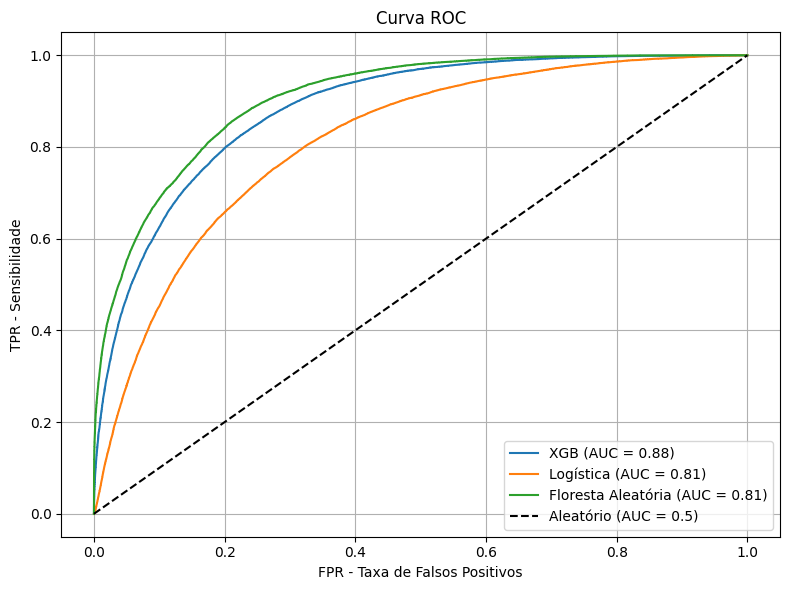

KS_XGB: 0.6008
KS_Logística: 0.4783
KS_Floresta: 0.6447


In [ ]:
## Curva ROC

# Probabilidades da classe positiva (geralmente a segunda coluna [:,1])
prob_xgb = xgb.predict_proba(X_test_xgb)[:, 1]
prob_log = logistico_model.predict_proba(X_test_rl)[:, 1]
prob_fa = floresta.predict_proba(X_test_fa)[:, 1]

# Calcular pontos da curva ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, prob_xgb)
fpr_log, tpr_log, _ = roc_curve(y_test, prob_log)
fpr_fa, tpr_fa, _ = roc_curve(y_test, prob_fa)

# Calcular AUC
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_log = auc(fpr_log, tpr_log)
auc_fa = auc(fpr_fa, tpr_fa)

# Plot da curva ROC
plot.figure(figsize=(8, 6))
plot.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC = {auc_xgb:.2f})')
plot.plot(fpr_log, tpr_log, label=f'Logística (AUC = {auc_log:.2f})')
plot.plot(fpr_fa, tpr_fa, label=f'Floresta Aleatória (AUC = {auc_log:.2f})')
plot.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)')
plot.xlabel('FPR - Taxa de Falsos Positivos')
plot.ylabel('TPR - Sensibilidade')
plot.title('Curva ROC')
plot.legend(loc='lower right')
plot.grid()
plot.tight_layout()
plot.show()

# KS
ks_xgb=max(tpr_xgb-fpr_xgb)
ks_log=max(tpr_log-fpr_log)
ks_fa=max(tpr_fa-fpr_fa)
print('KS_XGB:', builtins.round(ks_xgb, 4))
print('KS_Logística:', builtins.round(ks_log, 4))
print('KS_Floresta:', builtins.round(ks_fa, 4))

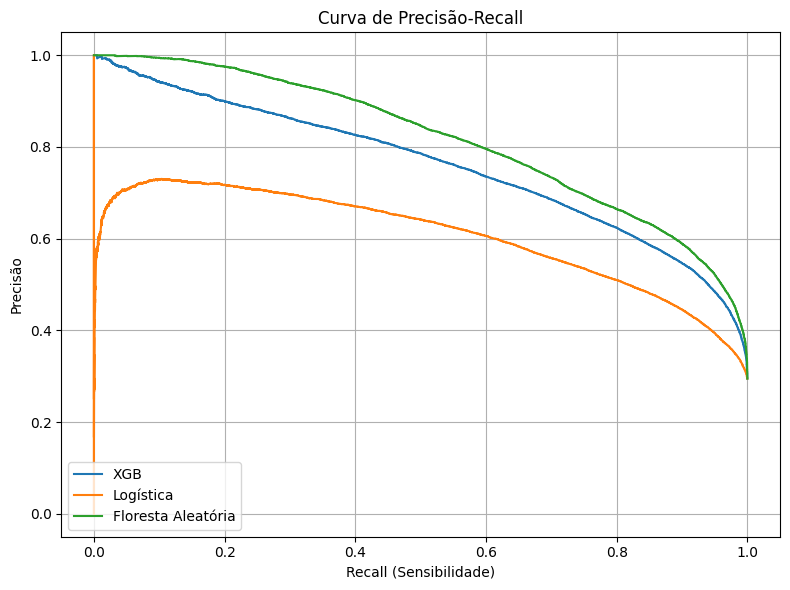

In [ ]:
# Calcular pontos da curva Precision-Recall
prec_xgb, rec_xgb, ths_xgb = precision_recall_curve(y_test, prob_xgb)
prec_log, rec_log, ths_log = precision_recall_curve(y_test, prob_log)
prec_fa, rec_fa, ths_fa= precision_recall_curve(y_test, prob_fa)

# Plot da curva Precision-Recall
plot.figure(figsize=(8, 6))
plot.plot(rec_xgb, prec_xgb, label='XGB')
plot.plot(rec_log, prec_log, label='Logística')
plot.plot(rec_fa, prec_fa, label='Floresta Aleatória')
plot.xlabel('Recall (Sensibilidade)')
plot.ylabel('Precisão')
plot.title('Curva de Precisão-Recall')
plot.legend(loc='lower left')
plot.grid()
plot.tight_layout()
plot.show()

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


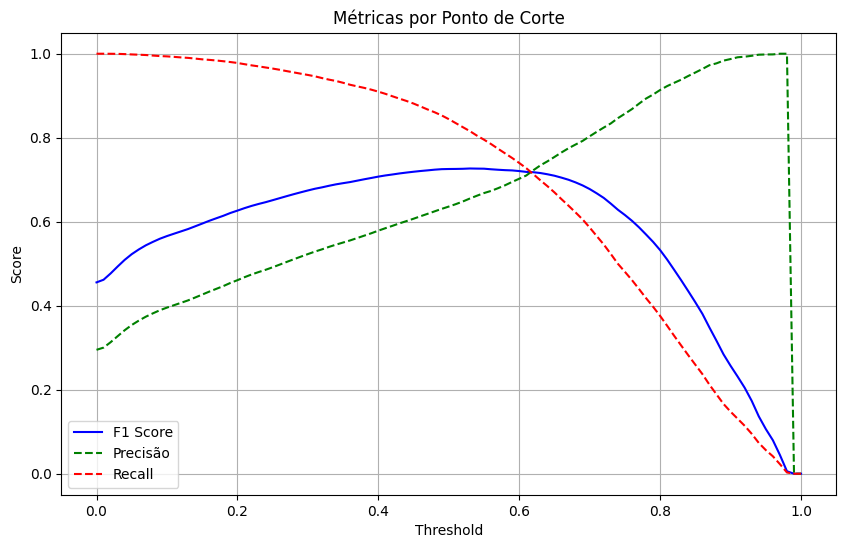

In [ ]:
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []
precisions = []
recalls = []

for t in thresholds:
    preds = (prob_fa >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))
    
plot.figure(figsize=(10, 6))
plot.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plot.plot(thresholds, precisions, label='Precisão', linestyle='--', color='green')
plot.plot(thresholds, recalls, label='Recall', linestyle='--', color='red')
plot.xlabel('Threshold')
plot.ylabel('Score')
plot.title('Métricas por Ponto de Corte')
plot.legend()
plot.grid(True)
plot.show()

In [ ]:
# Melhor threshold pelo maior F1-score
melhor_f1 = thresholds[np.argmax(f1_scores)]
print(f"Melhor ponto de corte pelo F1-score: {melhor_f1:.2f}")

Melhor ponto de corte pelo F1-score: 0.53


In [ ]:
# Converter listas para arrays
thresholds = np.array(thresholds)
f1_scores = np.array(f1_scores)
recalls = np.array(recalls)

# 1. Filtrar onde recall >= 0.80
idxs_validos = np.where(recalls >= 0.80)[0]

if len(idxs_validos) > 0:
    # 2. Pegar o índice do maior F1-score entre os válidos
    idx_melhor = idxs_validos[np.argmax(f1_scores[idxs_validos])]
    melhor_threshold_recall80 = thresholds[idx_melhor]
    melhor_f1 = f1_scores[idx_melhor]
    melhor_recall = recalls[idx_melhor]

    print(f"Melhor threshold com recall ≥ 80%: {melhor_threshold_recall80:.2f}")
    print(f"F1-score nesse threshold: {melhor_f1:.4f}")
    print(f"Recall nesse threshold: {melhor_recall:.4f}")
else:
    print("Nenhum threshold atinge recall ≥ 80%.") # trazer precisão

Melhor threshold com recall ≥ 80%: 0.53
F1-score nesse threshold: 0.7267
Recall nesse threshold: 0.8156


In [ ]:
melhor_threshold_recall80

np.float64(0.53)

C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_4612\490711240.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia, x='Importância', y='Variável', palette='viridis')


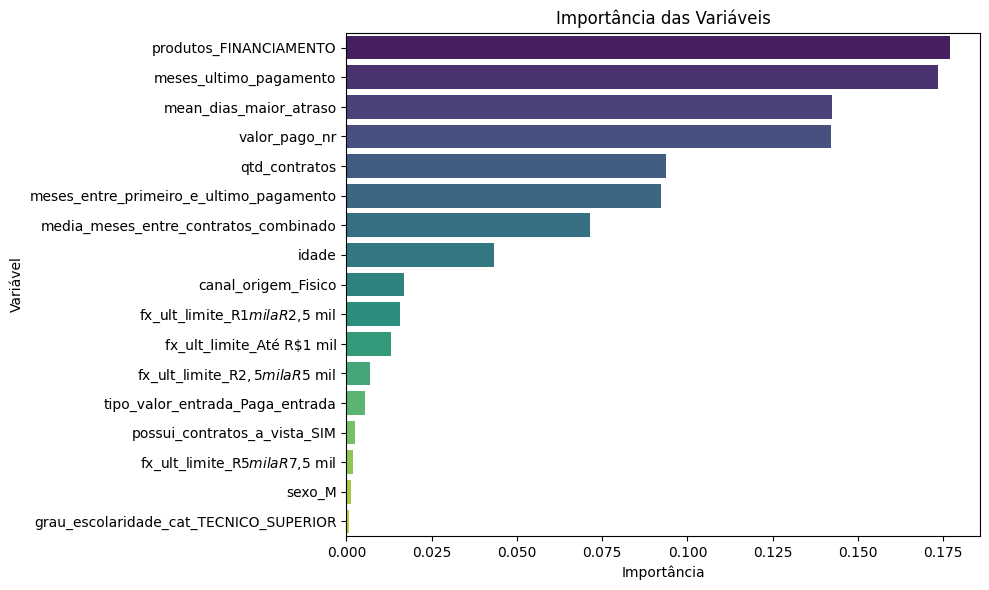

In [ ]:
## Gráfico de Importância das Variáveis do melhor modelo

importancias = floresta.feature_importances_
nomes_variaveis = X_final_fa.columns

df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias
})

# Ordenar por importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

# Plot
plot.figure(figsize=(10, 6))
sns.barplot(data=df_importancia, x='Importância', y='Variável', palette='viridis')
plot.title('Importância das Variáveis')
plot.xlabel('Importância')
plot.ylabel('Variável')
plot.tight_layout()
plot.show()

#### Pontuação Treino 

In [ ]:
#prob = xgb.predict_proba(X_final_xgb)[:, 1]
prob = floresta.predict_proba(X_final_fa)[:, 1]
X_train_comp = pd.DataFrame()
X_train_comp["id_cliente"] = ids_train.values
X_train_comp["PD"] = prob
X_train_comp["inad_e_reneg_prev"] = np.where(
    (X_train_comp["PD"] > melhor_threshold_recall80),
    1, 0
)
X_train_comp["Modelo"] = "Floresta"
#X_train_comp['rotulo_predito_base'] = xgb.predict(X_final_xgb)
X_train_comp['rotulo_predito_base'] = floresta.predict(X_final_fa)

In [ ]:
X_train_comp=X_train_comp.rename(columns={"id_cliente":"cpf_cnpj"})
relatorio_prob_inad_train=df_train.merge(X_train_comp,on="cpf_cnpj")

In [ ]:
pd.crosstab(
    relatorio_prob_inad_train["inad_e_reneg"],
    relatorio_prob_inad_train["inad_e_reneg_prev"],
    colnames=["Real"],
    rownames=["Previsto"],
    margins=True,
    #normalize='index'  # ou 'columns' ou 'all' # porcentagem
)
#trazer os valores shap

Real,0,1,All
Previsto,,,
0,134086,30451,164537
1,10645,58824,69469
All,144731,89275,234006


In [ ]:
labels = [0, 1]
cm_floresta = confusion_matrix(relatorio_prob_inad_train["inad_e_reneg"], relatorio_prob_inad_train["inad_e_reneg_prev"],labels=labels)
tn_fa, fp_fa, fn_fa, tp_fa = cm_floresta.ravel()
especificidade_fa = tn_fa / (tn_fa + fp_fa)
recall_fa = recall_score(relatorio_prob_inad_train["inad_e_reneg"], relatorio_prob_inad_train["inad_e_reneg_prev"])
accuracy_fa=accuracy_score(relatorio_prob_inad_train["inad_e_reneg"], relatorio_prob_inad_train["inad_e_reneg_prev"])
roc_fa=roc_auc_score(relatorio_prob_inad_train["inad_e_reneg"], relatorio_prob_inad_train["inad_e_reneg_prev"])
tx_inad_e_reneg=relatorio_prob_inad_train["inad_e_reneg"].mean()
import builtins

# Montar um dicionário com os resultados
resultados = {
    "PERIODO_MOVIMENTO": ["2025-08-01"],
    "MODELO": ["Floresta"],
    "SENSIBILIDADE": [builtins.round(recall_fa, 4)*100],
    "ESPECIFICIDADE": [builtins.round(especificidade_fa, 4)*100],
    "ACURACIA": [builtins.round(accuracy_fa, 4)*100],
    "AUC": [builtins.round(roc_fa, 4)*100],
    "VN": [tn_fa],
    "FP": [fp_fa],
    "FN": [fn_fa],
    "VP": [tp_fa],
    "TX_INAD_E_RENEG":[builtins.round(tx_inad_e_reneg,4)*100],
}

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar como tabela
df_resultados

,PERIODO_MOVIMENTO,MODELO,SENSIBILIDADE,ESPECIFICIDADE,ACURACIA,AUC,VN,FP,FN,VP,TX_INAD_E_RENEG
0,2025-08-01,Floresta,84.68,81.49,82.44,83.08,134086,30451,10645,58824,29.69


#### Pontuação Teste

In [ ]:
#prob = xgb.predict_proba(X_test_xgb)[:, 1]
X_test_fa=X_test_d_select[X_final_fa.columns]
prob = floresta.predict_proba(X_test_fa)[:, 1]
X_test_comp = pd.DataFrame()
X_test_comp["id_cliente"] = ids_test.values
X_test_comp["PD"] = prob
X_test_comp["inad_e_reneg_prev"] = np.where(
    (X_test_comp["PD"] > melhor_threshold_recall80),
    1, 0
)
X_test_comp["Modelo"] = "Floresta"
#X_test_comp['rotulo_predito_base'] = xgb.predict(X_test_xgb)
X_test_comp['rotulo_predito_base'] = floresta.predict(X_test_fa)

In [ ]:
X_test_comp=X_test_comp.rename(columns={"id_cliente":"cpf_cnpj"})
relatorio_prob_inad_test=df_test.merge(X_test_comp,on="cpf_cnpj")

In [ ]:
pd.crosstab(
    relatorio_prob_inad_test["inad_e_reneg"],
    relatorio_prob_inad_test["inad_e_reneg_prev"],
    colnames=["Real"],
    rownames=["Previsto"],
    margins=True,
    #normalize='index'  # ou 'columns' ou 'all' # porcentagem
)
#trazer os valores shap

Real,0,1,All
Previsto,,,
0,58015,12691,70706
1,5454,24129,29583
All,63469,36820,100289


# SHapley Additive exPlanations

### CPF específico

In [ ]:
df_treino=X_final_fa.copy()
df_treino["id"]= ids_train.values
amostra=df_treino.sample(1000, random_state=2025)
#amostra=df_treino[df_treino["id"]==4572208999]
cpfs = amostra["id"]
amostra.drop(columns=["id"], inplace=True)

In [ ]:
cpfs.head(5)

213442   39833666949.00
29882     4978521955.00
35913    13288487950.00
177992   75779471991.00
48656    72037393920.00
Name: id, dtype: float64

In [ ]:
# Shap
shap.initjs()
# Objeto explainer - XGBoost:TreeExplainer, Floresta Aleatoria:Explainer, Regressão Logística: LinearExplainer
explainer = shap.TreeExplainer(floresta)
# Calcular os valores SHAP no conjunto de treino
shap_values = explainer(amostra)

In [ ]:
for i_shap, col in enumerate(shap_values.feature_names):
    if col in num_cols:
        i_scaler = num_cols.index(col)  # posição da variável no scaler
        shap_values.data[:, i_shap] = (
            shap_values.data[:, i_shap] * scaler.scale_[i_scaler] + scaler.mean_[i_scaler]
        )

In [ ]:
# cpfs
cpfs = cpfs.values

In [ ]:
amostra.columns

Index(['idade', 'canal_origem_Fisico', 'media_meses_entre_contratos_combinado',
       'meses_ultimo_pagamento', 'meses_entre_primeiro_e_ultimo_pagamento',
       'valor_pago_nr', 'mean_dias_maior_atraso', 'qtd_contratos', 'sexo_M',
       'produtos_FINANCIAMENTO', 'grau_escolaridade_cat_TECNICO_SUPERIOR',
       'possui_contratos_a_vista_SIM', 'tipo_valor_entrada_Paga_entrada',
       'fx_ult_limite_Até R$1 mil', 'fx_ult_limite_R$1 mil a R$2,5 mil',
       'fx_ult_limite_R$2,5 mil a R$5 mil',
       'fx_ult_limite_R$5 mil a R$7,5 mil'],
      dtype='object')

In [ ]:
# Associa os shap values aos CPFs
shap_df = pd.DataFrame(shap_values.values[:, :, 1], index=cpfs, columns=amostra.columns)

In [ ]:
shap_df.head(5)

,idade,canal_origem_Fisico,media_meses_entre_contratos_combinado,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,valor_pago_nr,mean_dias_maior_atraso,qtd_contratos,sexo_M,produtos_FINANCIAMENTO,grau_escolaridade_cat_TECNICO_SUPERIOR,possui_contratos_a_vista_SIM,tipo_valor_entrada_Paga_entrada,fx_ult_limite_Até R$1 mil,"fx_ult_limite_R$1 mil a R$2,5 mil","fx_ult_limite_R$2,5 mil a R$5 mil","fx_ult_limite_R$5 mil a R$7,5 mil"
39833666949.00,-0.03,-0.00,0.03,-0.12,-0.01,-0.07,-0.10,0.07,0.00,0.12,0.00,0.00,0.01,-0.00,-0.01,-0.01,-0.00
4978521955.00,0.01,0.00,0.08,-0.04,0.00,0.24,-0.03,-0.09,-0.00,0.11,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
13288487950.00,0.08,-0.01,0.01,0.10,0.03,0.13,-0.13,-0.08,0.00,-0.11,-0.01,0.00,0.00,-0.02,-0.02,-0.01,0.00
75779471991.00,-0.03,-0.00,0.03,-0.22,0.02,0.11,-0.09,-0.07,-0.00,-0.14,0.00,0.00,0.00,-0.01,-0.01,-0.00,-0.00
72037393920.00,-0.05,-0.01,-0.04,0.08,-0.02,-0.04,-0.12,-0.01,0.00,-0.16,0.00,0.00,-0.01,-0.01,-0.02,-0.01,0.00


In [ ]:
# CPF específico
cpf_especifico = 39833666949 #ids_train.values[1]
shap_cliente = shap_df.loc[cpf_especifico]
i = shap_df.index.get_loc(cpf_especifico)
exp = shap_values[i]
i

0

In [ ]:
'''xs = np.linspace(-4,4 ,100)
plot.xlabel("Probabilidades de Inadimplência logarítmicas")
plot.ylabel("Probabilidade de Inadimplência")
plot.title("Como mudanças nas probabilidades logarítmicas se convertem em probabilidade de Inadimplência")
plot.plot(xs,1/(1+np.exp(-xs)))
plot.show()'''

'xs = np.linspace(-4,4 ,100)\nplot.xlabel("Probabilidades de Inadimplência logarítmicas")\nplot.ylabel("Probabilidade de Inadimplência")\nplot.title("Como mudanças nas probabilidades logarítmicas se convertem em probabilidade de Inadimplência")\nplot.plot(xs,1/(1+np.exp(-xs)))\nplot.show()'

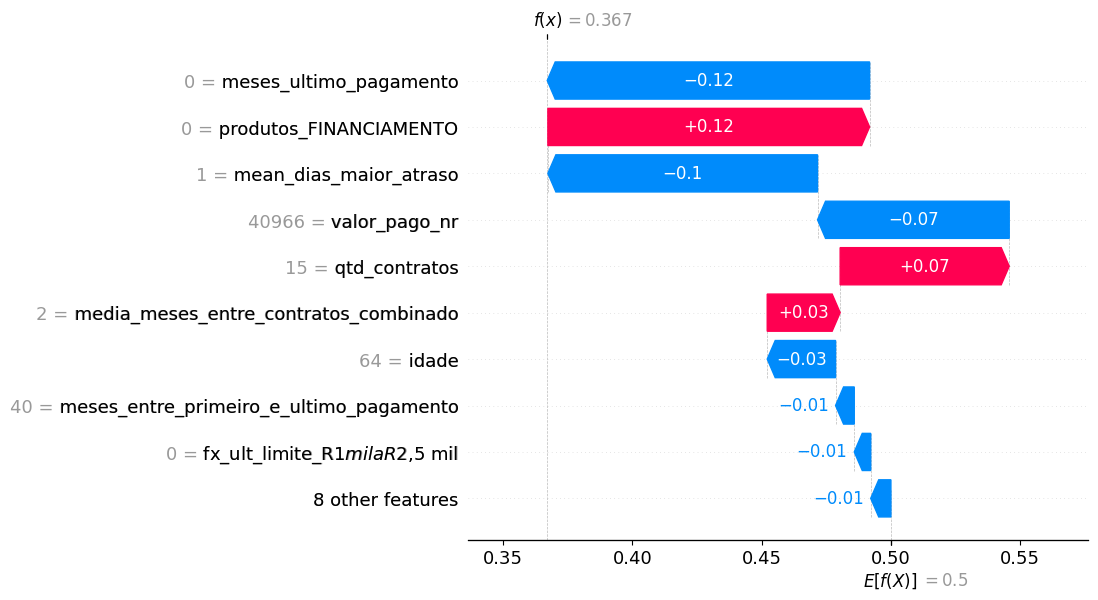

' # No caso do Xgboost converter as saídas para probabilidades\nfx = exp.base_values + exp.values.sum()\nprob = expit(fx)\n\nprint(f"Probabilidade prevista: {prob[0]:.2%}")'

In [ ]:
shap.plots.waterfall(shap_values[i, :, 1])

''' # No caso do Xgboost converter as saídas para probabilidades
fx = exp.base_values + exp.values.sum()
prob = expit(fx)

print(f"Probabilidade prevista: {prob[0]:.2%}")'''

In [ ]:
cpf_especifico

39833666949

In [ ]:
relatorio_prob_inad_train[relatorio_prob_inad_train["cpf_cnpj"] == cpf_especifico]

,sexo,idade,estado_civil,nacionalidade,tempo_relacionamento_kredilig_meses,situacao_conta,canal_origem,limite_total,limite_total_utilizado,data_ultima_alteracao_limite,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,valor_da_parcela_aberto,principal_total_fechado,qtd_parcelas_pagas,media_atraso_dias,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,ocupacao,grau_escolaridade_cat,regiao,tipo_cal_entre_contratos,tipo_valor_entrada,mean_atraso_possui_info,possui_contratos_a_vista,principal_total,cpf_cnpj,inad_e_reneg,fx_renda_valida,fx_principal_total_nr,fx_principal_total,fx_ult_limite,Cluster,PD,inad_e_reneg_prev,Modelo,rotulo_predito_base
213442,M,64,CASADO,BRASILEIRO,79.03,Ativa,Fisico,34704.00,23291.58,NaN,2.88,10,0,1128.21,21921.72,207,1.33,0.93,40.30,41.23,40966.69,38357.08,0.00,2743.21,EMPRESTIMO/FINANCIAMENTO,0,1.23,15,14592.00,34704.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Sul_Catarinense,Contratos_dias_diferentes,N_Paga_entrada,SIM,N_base_CARTAO,38357.08,39833666949.00,0,"De 1,5 SM a 2 SM",Acima de R$20mil,Acima de R$20mil,Acima de R$20mil,1,0.37,0,Floresta,0


In [ ]:
#shap.plots.force(shap_values[i, :, 1],matplotlib=True)

### Estudo das Variáveis

In [ ]:
#plot.style.use('default')  # fundo branco
#shap.plots.force(shap_values[:500])

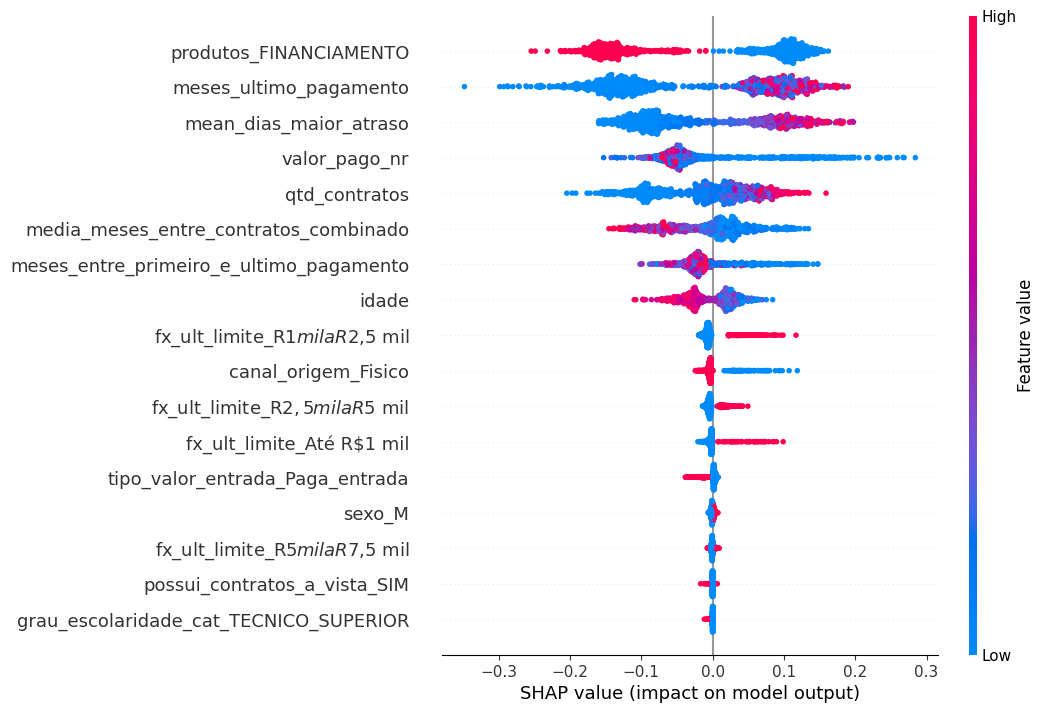

In [ ]:
# Seleciona apenas os shap values da classe 1
shap_beeswarm = shap.Explanation(
    values=shap_values.values[:, :, 1],          # só a classe positiva
    base_values=shap_values.base_values[:, 1],   # idem
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# Agora o beeswarm funciona
shap.plots.beeswarm(shap_beeswarm,max_display=50)

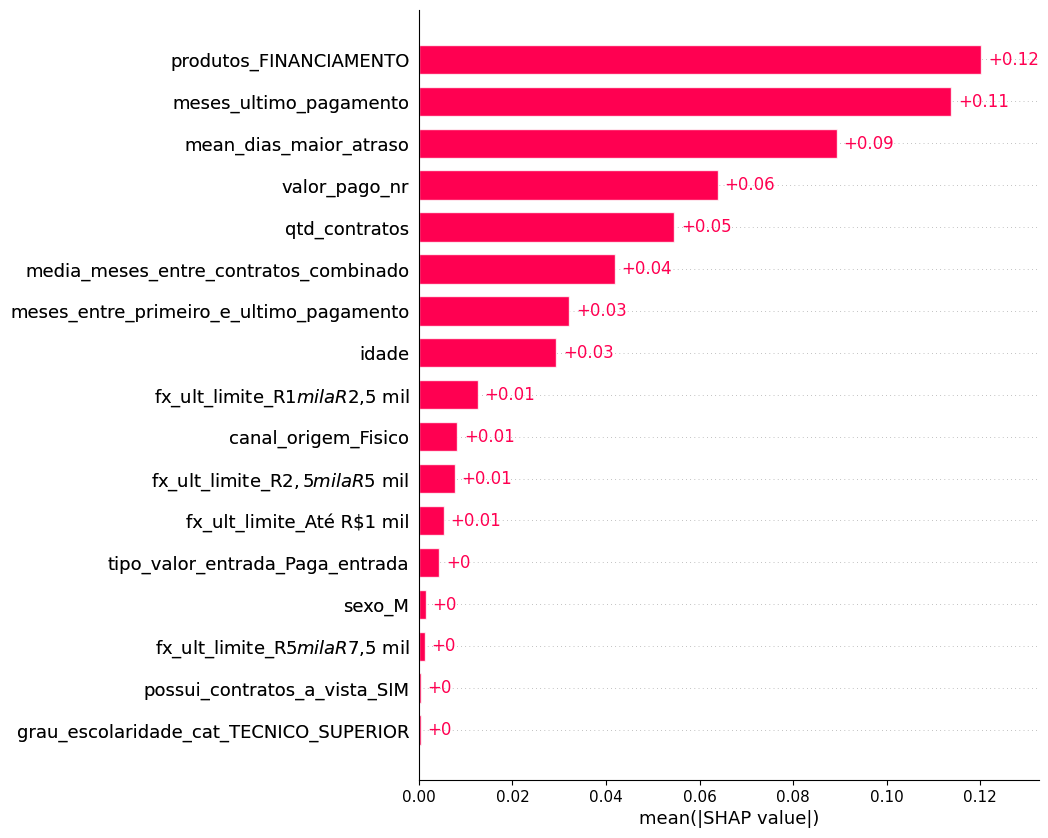

In [ ]:
# Reduz shap_values para só a classe positiva
shap_bar = shap.Explanation(
    values=shap_values.values[:, :, 1],          # shap da classe 1
    base_values=shap_values.base_values[:, 1],   # base da classe 1
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# Agora roda o bar plot
shap.plots.bar(shap_bar,max_display=50)

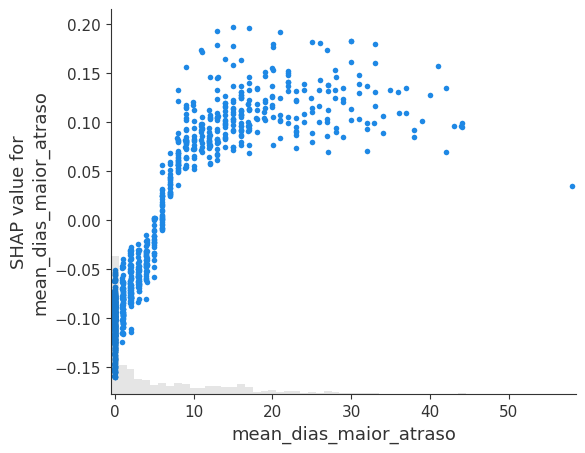

In [ ]:
['idade',
 'canal_origem_Fisico',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 'produtos_FINANCIAMENTO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_ult_limite_Até R$1 mil',
 'fx_ult_limite_R$1 mil a R$2,5 mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 'fx_ult_limite_R$5 mil a R$7,5 mil']

shap_values_class1 = shap.Explanation(
    values=shap_values.values[:, :, 1],
    base_values=shap_values.base_values[:, 1],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

feature_name = "mean_dias_maior_atraso"
feature_index = X_final_fa.columns.get_loc(feature_name)
shap.plots.scatter(shap_values_class1[:, feature_index])

# Escoragem

## Treino

In [ ]:
'''Z = xgb.predict(X_final_xgb, output_margin=True)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))
relatorio_prob_inad_train["Z"]=Z
relatorio_prob_inad_train["SCR"]=SCR'''

'''Z_prob = floresta.predict_proba(X_final_fa)[:, 1]  # probabilidade da classe positiva

Z = Z_prob * 2 - 1  # agora Z varia entre -1 e +1 (simulando margem)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))

# Transformar em SCR (0 a 1000)
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))

# Adicionar ao DataFrame
relatorio_prob_inad_train["Z"] = Z
relatorio_prob_inad_train["SCR"] = SCR'''"resumo_dados_saida ED.html"

prob = floresta.predict_proba(X_final_fa)[:, 1]
Z = np.log((1 - prob) / prob)
odds = (1 - prob) / prob

# Estatísticas das odds
odds_median = np.median(odds)

PDO = 50
Factor = PDO / np.log(2)
BaseScore = 600 - Factor * np.log(odds_median)

# Transformar em SCR (0 a 1000)
SCR = BaseScore + Factor * Z

# Adicionar ao DataFrame
relatorio_prob_inad_train["Z"] = Z
relatorio_prob_inad_train["SCR"] = SCR
relatorio_prob_inad_train["PD"] = prob

In [ ]:
odds_median

np.float64(1.7379314244647086)

In [ ]:
relatorio_prob_inad_train[["PD","Z","SCR"]].sample(5)

,PD,Z,SCR
29917,0.04,3.12,785.18
128229,0.60,-0.41,530.73
229406,0.03,3.47,810.38
202152,0.45,0.22,575.93
114554,0.02,3.91,842.05


In [ ]:
relatorio_prob_inad_train.describe()

,idade,tempo_relacionamento_kredilig_meses,limite_total,limite_total_utilizado,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,valor_da_parcela_aberto,principal_total_fechado,qtd_parcelas_pagas,media_atraso_dias,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,principal_total,cpf_cnpj,inad_e_reneg,Cluster,PD,inad_e_reneg_prev,rotulo_predito_base,Z,SCR
count,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00
mean,50.50,50.30,5393.45,1768.34,4.02,2.09,0.12,253.01,4228.21,38.17,33.93,9.13,18.82,27.95,5622.29,5407.64,35.84,2094.09,0.15,7.82,4.70,6316.62,7469.87,7033.25,33616537600.97,0.30,1.64,0.40,0.38,0.40,0.70,610.70
std,16.15,31.53,6180.01,3827.60,5.30,3.39,0.53,338.42,7211.87,52.44,94.45,10.85,12.97,11.26,7566.24,6615.41,191.55,796.72,1.46,10.01,5.64,4680.45,5602.47,9486.81,32114474503.50,0.46,1.23,0.31,0.49,0.49,1.93,139.47
min,18.00,6.03,0.00,-2990.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.70,-0.17,-0.63,0.00,0.00,0.00,508.20,0.00,0.00,1.00,8.00,108.00,0.01,1148044.00,0.00,0.00,0.00,0.00,0.00,-4.90,206.85
25%,38.00,22.73,0.00,0.00,0.00,0.00,0.00,0.00,410.00,9.00,0.60,0.83,7.63,18.83,1105.00,1449.00,0.00,1617.00,0.00,0.16,1.00,3000.00,3600.00,1882.31,5343088922.00,0.00,1.00,0.10,0.00,0.00,-0.74,506.63
50%,51.00,43.70,4400.00,0.00,2.50,1.00,0.00,163.00,2153.90,20.00,4.00,3.83,17.07,31.20,3169.31,3383.99,0.00,1888.00,0.00,3.39,3.00,5508.00,6569.00,4101.74,13985423416.00,0.00,2.00,0.37,0.00,0.00,0.55,600.00
75%,63.00,73.83,8800.00,1960.00,5.97,3.00,0.00,357.00,5234.24,47.00,17.67,15.13,30.87,38.23,7285.97,6989.87,0.00,2194.08,0.00,12.25,6.00,8256.00,9936.00,8645.17,63598009998.50,1.00,2.00,0.68,1.00,1.00,2.19,717.99
max,100.00,125.53,100000.00,83391.92,41.47,126.00,14.00,9620.12,310660.49,1410.00,1200.00,41.70,42.20,41.60,310434.77,287161.52,12460.00,23447.00,122.00,60.00,133.00,80000.00,100000.00,329851.85,99997908953.00,1.00,4.00,0.99,1.00,1.00,5.54,960.01


In [ ]:
relatorio_prob_inad_train["fx_SCR"], bins =pd.qcut(relatorio_prob_inad_train.SCR,q=20, retbins=True) # categorização por quantil
# expandir os extremos
bins[0] = -np.inf
bins[-1] = np.inf
#np.save("bins_SCR.npy", bins)
relatorio_prob_inad_train["fx_PD"], bins_prob =pd.qcut(relatorio_prob_inad_train.PD,q=10, retbins=True) # categorização por quantil
# expandir os extremos
bins_prob[0] = -np.inf
bins_prob[-1] = np.inf
#np.save("bins_PD.npy", bins_prob)

In [ ]:
relatorio_prob_inad_train.fx_PD.value_counts().sort_index()

fx_PD
(0.0029, 0.0323]    23401
(0.0323, 0.0695]    23401
(0.0695, 0.143]     23400
(0.143, 0.24]       23401
(0.24, 0.365]       23400
(0.365, 0.506]      23401
(0.506, 0.626]      23400
(0.626, 0.729]      23401
(0.729, 0.84]       23400
(0.84, 0.993]       23401
Name: count, dtype: int64

In [ ]:
tab_cruz = pd.crosstab(relatorio_prob_inad_train["fx_SCR"], relatorio_prob_inad_train["inad_e_reneg"])
tab_cruz

inad_e_reneg,0,1
fx_SCR,,
"(206.844, 397.284]",112,11589
"(397.284, 440.325]",1089,10611
"(440.325, 468.549]",2538,9162
"(468.549, 488.858]",3844,7857
"(488.858, 506.625]",4959,6741
"(506.625, 523.124]",6146,5554
"(523.124, 539.37]",7042,4658
"(539.37, 558.508]",7679,4022
"(558.508, 579.147]",8614,3086


In [ ]:
#relatorio_prob_inad_train.to_csv("relatorio_prob_inad_train.csv", index=False)

## Teste

In [ ]:
'''Z = xgb.predict(X_test_xgb, output_margin=True)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))
relatorio_prob_inad_test["Z"]=Z
relatorio_prob_inad_test["SCR"]=SCR'''

'''Z_prob = floresta.predict_proba(X_test_fa)[:, 1]  # probabilidade da classe positiva

Z = Z_prob * 2 - 1  # agora Z varia entre -1 e +1 (simulando margem)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))

# Transformar em SCR (0 a 1000)
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))

# Adicionar ao DataFrame
relatorio_prob_inad_test["Z"] = Z
relatorio_prob_inad_test["SCR"] = SCR'''

prob_test = floresta.predict_proba(X_test_fa)[:, 1]
Z_test = np.log((1 - prob_test) / prob_test)

# Transformar em SCR (0 a 1000)
SCR_test = BaseScore + Factor * Z_test

# Adicionar ao DataFrame
relatorio_prob_inad_test["Z"] = Z_test
relatorio_prob_inad_test["SCR"] = SCR_test
relatorio_prob_inad_test["PD"] = prob_test

In [ ]:
bins_carregado = np.load("bins_SCR.npy")
relatorio_prob_inad_test["fx_SCR"]=pd.cut(relatorio_prob_inad_test.SCR, bins=bins_carregado)
bins_carregado_PD = np.load("bins_PD.npy")
relatorio_prob_inad_test["fx_PD"]=pd.cut(relatorio_prob_inad_test.PD, bins=bins_carregado_PD)

In [ ]:
relatorio_prob_inad_test.fx_SCR.value_counts().sort_index()

fx_SCR
(-inf, 397.284]       4131
(397.284, 440.325]    4646
(440.325, 468.549]    5004
(468.549, 488.858]    4942
(488.858, 506.625]    4983
(506.625, 523.124]    4888
(523.124, 539.37]     4971
(539.37, 558.508]     5267
(558.508, 579.147]    5184
(579.147, 600.0]      4946
(600.0, 622.11]       4931
(622.11, 643.365]     5069
(643.365, 665.498]    5064
(665.498, 689.03]     5254
(689.03, 717.985]     4942
(717.985, 747.317]    4774
(747.317, 776.581]    5201
(776.581, 805.403]    5250
(805.403, 843.171]    5293
(843.171, inf]        5549
Name: count, dtype: int64

In [ ]:
tab_cruz_test = pd.crosstab(relatorio_prob_inad_test["fx_SCR"], relatorio_prob_inad_test["inad_e_reneg"])
tab_cruz_test

inad_e_reneg,0,1
fx_SCR,,
"(-inf, 397.284]",40,4091
"(397.284, 440.325]",422,4224
"(440.325, 468.549]",991,4013
"(468.549, 488.858]",1676,3266
"(488.858, 506.625]",2052,2931
"(506.625, 523.124]",2546,2342
"(523.124, 539.37]",2992,1979
"(539.37, 558.508]",3298,1969
"(558.508, 579.147]",3651,1533


In [ ]:
#relatorio_prob_inad_test[["id_cliente","inad_reneg_real","SCR","fx_SCR"]].to_excel("amostraSCR_regiao.xlsx")

In [ ]:
relatorio_prob_inad_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100289 entries, 0 to 100288
Data columns (total 53 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   sexo                                      100289 non-null  object  
 1   idade                                     100289 non-null  int64   
 2   estado_civil                              100289 non-null  object  
 3   nacionalidade                             100289 non-null  object  
 4   tempo_relacionamento_kredilig_meses       100289 non-null  float64 
 5   situacao_conta                            100289 non-null  object  
 6   canal_origem                              100289 non-null  object  
 7   limite_total                              100289 non-null  float64 
 8   limite_total_utilizado                    100289 non-null  float64 
 9   data_ultima_alteracao_limite              40221 non-null   object  
 10  media_me

In [ ]:
#relatorio_prob_inad_test.to_csv("relatorio_prob_inad_test.csv", index=False)

# Limites

## Treino

In [ ]:
#thresholds=np.arange(0, 1.01, 0.01)

In [ ]:
relatorio_limites_train=relatorio_prob_inad_train.copy()

In [ ]:
#relatorio_limites_train["fx_risco"]= pd.cut(relatorio_limites_train["PD"], bins=thresholds, include_lowest=True)

In [ ]:
relatorio_limites_train["fx_risco"], bins_risco =pd.qcut(relatorio_limites_train.SCR,q=100, retbins=True) # categorização por quantil
# expandir os extremos
bins_risco[0] = -np.inf
bins_risco[-1] = np.inf
np.save("bins_risco.npy", bins_risco)

In [ ]:
bins_risco_carregado = np.load("bins_risco.npy")
relatorio_prob_inad_train["fx_risco"]=pd.cut(relatorio_prob_inad_train.SCR, bins=bins_risco_carregado)

In [ ]:
relatorio_prob_inad_train.head()

,sexo,idade,estado_civil,nacionalidade,tempo_relacionamento_kredilig_meses,situacao_conta,canal_origem,limite_total,limite_total_utilizado,data_ultima_alteracao_limite,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,valor_da_parcela_aberto,principal_total_fechado,qtd_parcelas_pagas,media_atraso_dias,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,ocupacao,grau_escolaridade_cat,regiao,tipo_cal_entre_contratos,tipo_valor_entrada,mean_atraso_possui_info,possui_contratos_a_vista,principal_total,cpf_cnpj,inad_e_reneg,fx_renda_valida,fx_principal_total_nr,fx_principal_total,fx_ult_limite,Cluster,PD,inad_e_reneg_prev,Modelo,rotulo_predito_base,Z,SCR,fx_SCR,fx_PD,fx_risco
0,F,47,CASADO,BRASILEIRO,33.23,Ativa,Digital,6552.00,0.00,2025-03-07,2.95,7,0,0.00,9668.22,66,7.12,6.77,26.43,33.20,8737.93,8737.93,0.00,1617.00,EMPRESTIMO/FINANCIAMENTO,0,8.43,8,6552.00,6552.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Grande_Florianópolis,Contratos_dias_diferentes,N_Paga_entrada,SIM,NAO,9668.22,2055919903.00,0,"De 1 SM a 1,25 SM",R$5 mil a R$10mil,"R$7,5 mil a R$10mil","R$5 mil a R$7,5 mil",1,0.84,1,Floresta,1,-1.67,439.49,"(397.284, 440.325]","(0.84, 0.993]","(433.788, 440.325]"
1,F,42,CASADO,BRASILEIRO,80.93,Bloqueada,Fisico,0.00,0.00,NaN,0.00,0,0,506.59,53880.66,100,31.40,10.83,29.63,40.47,5534.80,2255.00,0.00,1940.00,EMPRESTIMO,0,26.23,10,14000.00,14000.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Vale_do_Itajaí,Apenas_1_contrato,N_Paga_entrada,SIM,NAO,69278.40,4909271902.00,1,"De 1,25 SM a 1,5 SM",R$2 mil a R$5mil,Acima de R$20mil,R$10 mil a R$15mil,0,0.83,1,Floresta,1,-1.61,443.86,"(440.325, 468.549]","(0.729, 0.84]","(440.325, 446.956]"
2,F,43,CASADO,BRASILEIRO,81.83,Ativa,Fisico,11675.00,1396.00,NaN,0.00,0,0,349.00,0.00,7,3.00,1.80,7.00,8.80,2437.35,3487.99,0.00,5000.00,FINANCIAMENTO,0,2.33,1,9552.00,11675.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Sul_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,N_base_CARTAO,3487.99,3177736901.00,0,Acima de 3 SM,R$2 mil a R$5mil,"R$2,5 mil a R$5 mil",R$10 mil a R$15mil,0,0.02,0,Floresta,0,3.70,826.83,"(805.403, 843.171]","(0.0029, 0.0323]","(825.252, 833.53]"
3,F,59,DIVORCIADO,BRASILEIRO,68.37,Bloqueada,Fisico,0.00,0.00,2023-07-02,0.00,0,0,160.00,0.00,6,322.00,30.17,5.73,35.90,0.00,0.00,0.00,1730.00,EMPRESTIMO,0,31.33,1,5000.00,5000.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Vale_do_Itajaí,Apenas_1_contrato,N_Paga_entrada,SIM,N_base_CARTAO,1248.30,74158287987.00,1,"De 1 SM a 1,25 SM",0,"R$1 mil a R$2,5 mil","R$2,5 mil a R$5 mil",0,0.73,1,Floresta,1,-1.01,486.99,"(468.549, 488.858]","(0.729, 0.84]","(485.145, 488.858]"
4,M,38,CASADO,BRASILEIRO,20.80,Bloqueada,Fisico,0.00,0.00,2024-09-07,0.93,0,0,124.00,0.00,2,284.33,19.30,1.17,20.47,261.00,480.00,26.83,3000.00,FINANCIAMENTO,0,3.61,3,1000.00,1000.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Vale_do_Itajaí,Contratos_dias_diferentes,Paga_entrada,SIM,NAO,480.00,5599390942.00,1,"De 1,5 SM a 2 SM",Até R$2 mil,Até R$1 mil,Até R$1 mil,4,0.91,1,Floresta,1,-2.32,392.47,"(206.844, 397.284]","(0.84, 0.993]","(381.166, 397.284]"


In [ ]:
limites_agrupados = (relatorio_prob_inad_train.groupby("fx_risco").agg(
    qtd=("fx_risco", "size"),
    media_prob=("PD", "mean"),
    media_scr=("SCR", "mean"),
    sd_limite=("limite_total_ultimo_mes", "std"),
    media_limite=("limite_total_ultimo_mes", "mean"),
    mediana_limite=("limite_total_ultimo_mes", "median"),
    pd_observado=("inad_e_reneg", "mean"),
    min_limite=("limite_total_ultimo_mes", "min"),
    max_limite=("limite_total_ultimo_mes", "max"),)
    .reset_index()
    )

C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_3828\2584468284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  limites_agrupados = (relatorio_prob_inad_train.groupby("fx_risco").agg(


In [ ]:
limites_agrupados.head()

,fx_risco,qtd,media_prob,media_scr,sd_limite,media_limite,mediana_limite,pd_observado,min_limite,max_limite
0,"(-inf, 301.431]",2341,0.98,276.89,1550.01,2027.60,1440.00,1.00,500.00,14952.00
1,"(301.431, 336.583]",2340,0.97,319.08,2566.33,3131.93,2214.00,1.00,400.00,26064.00
2,"(336.583, 362.378]",2340,0.95,351.47,2939.79,3459.26,2547.64,0.99,500.00,24000.00
3,"(362.378, 381.166]",2340,0.93,372.11,3057.94,3840.60,3000.00,0.99,500.00,27096.00
4,"(381.166, 397.284]",2340,0.91,389.52,3493.12,4189.13,3000.00,0.97,400.00,28056.00


In [ ]:
from scipy.stats import sem, t
def IC95(mean, sd, n):
    if n <= 1 or np.isnan(sd):
        return (np.nan, np.nan)
    se = sd / np.sqrt(n)
    h = se * t.ppf(0.975, df=n-1)
    return (mean - h, mean + h)

In [ ]:
ICs = limites_agrupados.apply(lambda r: IC95(r["media_limite"], r["sd_limite"], int(r["qtd"])), axis=1)

In [ ]:
limites_agrupados["IC_inf"], limites_agrupados["IC_sup"] = zip(*ICs)

In [ ]:
limites_agrupados.head()

,fx_risco,qtd,media_prob,media_scr,sd_limite,media_limite,mediana_limite,pd_observado,min_limite,max_limite,IC_inf,IC_sup
0,"(-inf, 301.431]",2341,0.98,276.89,1550.01,2027.60,1440.00,1.00,500.00,14952.00,1964.78,2090.42
1,"(301.431, 336.583]",2340,0.97,319.08,2566.33,3131.93,2214.00,1.00,400.00,26064.00,3027.90,3235.97
2,"(336.583, 362.378]",2340,0.95,351.47,2939.79,3459.26,2547.64,0.99,500.00,24000.00,3340.09,3578.44
3,"(362.378, 381.166]",2340,0.93,372.11,3057.94,3840.60,3000.00,0.99,500.00,27096.00,3716.64,3964.56
4,"(381.166, 397.284]",2340,0.91,389.52,3493.12,4189.13,3000.00,0.97,400.00,28056.00,4047.53,4330.74


In [ ]:
limites_ordenados=limites_agrupados.sort_values("media_limite").reset_index(drop=True)

In [ ]:
limites_ordenados.head()

,fx_risco,qtd,media_prob,media_scr,sd_limite,media_limite,mediana_limite,pd_observado,min_limite,max_limite,IC_inf,IC_sup
0,"(-inf, 301.431]",2341,0.98,276.89,1550.01,2027.60,1440.00,1.00,500.00,14952.00,1964.78,2090.42
1,"(301.431, 336.583]",2340,0.97,319.08,2566.33,3131.93,2214.00,1.00,400.00,26064.00,3027.90,3235.97
2,"(336.583, 362.378]",2340,0.95,351.47,2939.79,3459.26,2547.64,0.99,500.00,24000.00,3340.09,3578.44
3,"(362.378, 381.166]",2340,0.93,372.11,3057.94,3840.60,3000.00,0.99,500.00,27096.00,3716.64,3964.56
4,"(381.166, 397.284]",2340,0.91,389.52,3493.12,4189.13,3000.00,0.97,400.00,28056.00,4047.53,4330.74


In [ ]:
from sklearn.isotonic import IsotonicRegression
RI=IsotonicRegression()

In [ ]:
x = np.arange(len(limites_ordenados))
y = limites_ordenados["media_limite"].values

In [ ]:
y_iso = RI.fit_transform(limites_ordenados["media_scr"], limites_ordenados["media_limite"])
limites_ordenados["media_limite_isotonico"] = y_iso

In [ ]:
limites_ordenados["media_scr"]

0    276.89
1    319.08
2    351.47
3    372.11
4    389.52
5    403.72
6    414.66
7    423.13
8    430.42
9    437.04
10   443.64
11   449.99
12   490.66
13   475.04
14   466.21
15   527.59
16   455.91
17   461.25
18   479.13
19   504.93
20   483.17
21   515.22
22   524.72
23   470.76
24   494.23
25   521.62
26   530.78
27   508.45
28   501.40
29   511.99
30   487.03
31   721.12
32   497.83
33   714.85
34   541.10
35   518.43
36   534.13
37   537.61
38   708.62
39   727.13
40   738.74
41   732.89
42   702.59
43   544.91
44   756.22
45   744.49
46   696.80
47   750.21
48   891.19
49   762.25
50   548.93
51   848.04
52   768.10
53   691.49
54   611.36
55   838.23
56   552.78
57   645.68
58   686.67
59   624.19
60   681.80
61   676.93
62   556.55
63   872.05
64   560.49
65   628.51
66   829.32
67   667.81
68   650.32
69   858.48
70   663.33
71   808.68
72   785.27
73   821.69
74   779.52
75   773.71
76   632.86
77   672.29
78   606.77
79   615.69
80   802.47
81   815.25
82   620.00
83  

In [ ]:
# tratar NaNs

# 7) resultado final
resultados = limites_ordenados[[
    "fx_risco",	"qtd",	"media_prob",	"media_scr","sd_limite",	"media_limite",	"mediana_limite",	
    "pd_observado",	"min_limite",	"max_limite",	"IC_inf",	"IC_sup","media_limite_isotonico"
]]

resultados["fx_risco"]=resultados["fx_risco"].astype("category")
resultados.to_csv("resultados_limites.csv", index=False)

In [ ]:
resultados.head()

,fx_risco,qtd,media_prob,media_scr,sd_limite,media_limite,mediana_limite,pd_observado,min_limite,max_limite,IC_inf,IC_sup,media_limite_isotonico
0,"(-inf, 301.431]",2341,0.98,276.89,1550.01,2027.60,1440.00,1.00,500.00,14952.00,1964.78,2090.42,2027.60
1,"(301.431, 336.583]",2340,0.97,319.08,2566.33,3131.93,2214.00,1.00,400.00,26064.00,3027.90,3235.97,3131.93
2,"(336.583, 362.378]",2340,0.95,351.47,2939.79,3459.26,2547.64,0.99,500.00,24000.00,3340.09,3578.44,3459.26
3,"(362.378, 381.166]",2340,0.93,372.11,3057.94,3840.60,3000.00,0.99,500.00,27096.00,3716.64,3964.56,3840.60
4,"(381.166, 397.284]",2340,0.91,389.52,3493.12,4189.13,3000.00,0.97,400.00,28056.00,4047.53,4330.74,4189.13


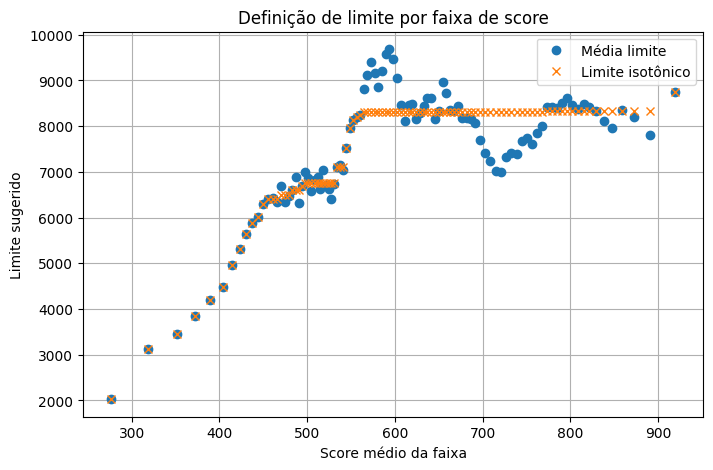

In [ ]:
plot.figure(figsize=(8,5))
plot.plot(resultados["media_scr"], resultados["media_limite"], marker="o", linestyle="", label="Média limite")
plot.plot(resultados["media_scr"], resultados["media_limite_isotonico"], marker="x", linestyle="", label="Limite isotônico")
plot.xlabel("Score médio da faixa")
plot.ylabel("Limite sugerido")
plot.title("Definição de limite por faixa de score")
plot.legend()
plot.grid(True)
plot.show()

In [ ]:
relatorio_limites_train=relatorio_prob_inad_train.merge(resultados[["fx_risco","media_limite_isotonico"]],on="fx_risco", how="left")
relatorio_limites_train["fx_risco"]=relatorio_limites_train["fx_risco"].astype("category")

In [ ]:
relatorio_limites_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234006 entries, 0 to 234005
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   sexo                                      234006 non-null  object  
 1   idade                                     234006 non-null  int64   
 2   estado_civil                              234006 non-null  object  
 3   nacionalidade                             234006 non-null  object  
 4   tempo_relacionamento_kredilig_meses       234006 non-null  float64 
 5   situacao_conta                            234006 non-null  object  
 6   canal_origem                              234006 non-null  object  
 7   limite_total                              234006 non-null  float64 
 8   limite_total_utilizado                    234006 non-null  float64 
 9   data_ultima_alteracao_limite              94329 non-null   object  
 10  media_me

In [ ]:
relatorio_limites_train.columns.to_list()

['sexo',
 'idade',
 'estado_civil',
 'nacionalidade',
 'tempo_relacionamento_kredilig_meses',
 'situacao_conta',
 'canal_origem',
 'limite_total',
 'limite_total_utilizado',
 'data_ultima_alteracao_limite',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'qtd_reneg_aberto_regular',
 'valor_da_parcela_aberto',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'media_atraso_dias',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'renda_valida_new',
 'produtos',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_primeiro_mes',
 'limite_total_ultimo_mes',
 'ocupacao',
 'grau_escolaridade_cat',
 'regiao',
 'tipo_cal_entre_contratos',
 'tipo_valor_entrada',
 'mean_atraso_possui_info',
 'possui_contratos_a_vista',
 'principal_total',
 'cpf_cnpj',
 'inad_e_reneg',
 'fx_renda_valida

In [ ]:
relatorio_limites_train["%_variacao_limite"]=((relatorio_limites_train["media_limite_isotonico"]/relatorio_limites_train["limite_total_ultimo_mes"])-1)*100
relatorio_limites_train["%_end"]=(relatorio_limites_train["valor_da_parcela_aberto"]/relatorio_limites_train["renda_valida_new"])*100
relatorio_limites_train["%_limite_utilizado"]=(relatorio_limites_train["limite_total_utilizado"]/relatorio_limites_train["limite_total"])*100

In [ ]:
amostra_limite=relatorio_limites_train[[
 'cpf_cnpj',
 'idade',
 'limite_total_primeiro_mes',
 'limite_total_ultimo_mes',
 'limite_total_utilizado',
 'data_ultima_alteracao_limite',
 'limite_total',
 'media_limite_isotonico',
 "%_variacao_limite",
 "%_limite_utilizado",
 "%_end",
 'inad_e_reneg',
 'PD',
 'SCR',
 'fx_risco',
 'situacao_conta',
 'media_atraso_dias',
 'valor_da_parcela_aberto',
 'qtd_reneg_aberto_regular',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos',
 'qtd_contratos_fechado_regular',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'meses_ultimo_pagamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'renda_valida_new',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 'principal_total',
 ]][(relatorio_limites_train["inad_e_reneg"]==0)&(relatorio_limites_train["situacao_conta"]!="Cancelada")].sample(1000,random_state=2025)

# Variáveis importantes para analise
# Média de atraso maior que 40 flag Reduzir
# Compromentimento da renda (teto á definir)
# % de variação do limite ultimo e limite do modelo behavior OK
# Trazer variável limite atual mesmo que zero
# Filtrar cancelados OK
# obs: bloqueados maior que 721 dias vai passar pelo behavior?
# obs: 91 dias zera limite

In [ ]:
amostra_limite.head()

,cpf_cnpj,idade,limite_total_primeiro_mes,limite_total_ultimo_mes,limite_total_utilizado,data_ultima_alteracao_limite,limite_total,media_limite_isotonico,%_variacao_limite,%_limite_utilizado,%_end,inad_e_reneg,PD,SCR,fx_risco,situacao_conta,media_atraso_dias,valor_da_parcela_aberto,qtd_reneg_aberto_regular,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,qtd_contratos,qtd_contratos_fechado_regular,principal_total_fechado,qtd_parcelas_pagas,meses_ultimo_pagamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,qtd_total_fechado_a_vista,mean_dias_maior_atraso,principal_total
230571,93323387953.00,52,2920.00,11040.00,1461.80,2025-09-07,11040.00,8325.46,-24.59,13.24,20.71,0,0.01,892.15,"(881.102, 902.963]",Ativa,0.00,292.36,0,105.57,0.00,1,0,0.00,13,0.77,3786.82,3497.06,0.00,1412.00,0,0.00,3497.06
142858,46561021991.00,67,12000.00,12000.00,2484.00,NaN,12000.00,8325.46,-30.62,20.70,10.71,0,0.04,788.65,"(788.069, 793.852]",Ativa,0.00,276.00,0,17.73,4.94,4,3,2192.46,13,2.53,4520.35,5098.32,18.75,2577.54,0,0.00,5098.32
219053,7343398105.00,36,7200.00,7200.00,0.00,2024-03-04,0.00,5646.67,-21.57,NaN,0.00,0,0.85,433.28,"(426.962, 433.788]",Bloqueada,90.60,0.00,0,49.27,1.04,5,1,6557.00,31,18.07,6103.30,5872.00,52.50,1484.00,1,7.02,6557.00
190494,157500942.00,47,7500.00,7500.00,0.00,2024-06-11,0.00,6498.22,-13.36,NaN,0.00,0,0.76,477.55,"(477.046, 481.156]",Bloqueada,125.50,0.00,0,101.07,0.67,6,0,7486.59,53,8.90,6073.60,5186.59,0.00,1940.00,0,0.00,7486.59
169622,2722487977.00,48,6012.00,9218.00,0.00,NaN,9218.00,8308.06,-9.87,0.00,0.00,0,0.14,692.30,"(689.03, 694.032]",Ativa,2.33,0.00,0,90.00,14.83,3,3,3214.91,22,7.63,4565.45,3214.91,0.00,1530.00,0,3.66,3214.91


In [ ]:
#amostra_limite.to_excel("amostra_limite.xlsx")

## Modelos

### Regressão Linear

In [ ]:
X = relatorio_limites_train[["SCR", "renda_valida_new", "idade","mean_dias_maior_atraso"]] # variáveis explicativas
y = relatorio_limites_train["limite_total_ultimo_mes"] # variável resposta

In [ ]:
limite_lr = LinearRegression()
limite_lr.fit(X, y)

LinearRegression()

### Regressão Isotônica

In [ ]:
limite_iso = IsotonicRegression(out_of_bounds="clip")
limite_iso.fit(X["SCR"], y)

IsotonicRegression(out_of_bounds='clip')

### Floresta Aleatória

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Treinar o modelo floresta
limite_rf = RandomForestRegressor(
    n_estimators=500,  # número de árvores
    max_depth=10,    # profundidade livre
    random_state=2025,
    n_jobs=-1
)
limite_rf.fit(X, y)

RandomForestRegressor(max_depth=10, n_estimators=500, n_jobs=-1,
                      random_state=2025)

In [ ]:
importances = pd.Series(limite_rf.feature_importances_, index=X.columns)
# Ordena da mais importante para a menos importante
importances = importances.sort_values(ascending=False)
print(importances)

idade                    0.50
SCR                      0.23
mean_dias_maior_atraso   0.18
renda_valida_new         0.08
dtype: float64


In [ ]:
'''plot.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=X.columns)
plot.show()'''

'plot.figure(figsize=(20, 10))\nplot_tree(rf.estimators_[0], filled=True, feature_names=X.columns)\nplot.show()'

### XGboost

In [ ]:
monotone_constraints = (1, 0, 0)
y_train_log = np.log(y)
limite_xgb = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    monotone_constraints=monotone_constraints,
    random_state=42
)
limite_xgb.fit(X, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=(1, 0, 0), multi_strategy=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
importances = pd.Series(limite_xgb.feature_importances_, index=X.columns)
# Ordena da mais importante para a menos importante
importances = importances.sort_values(ascending=False)
print(importances)

idade                    0.41
SCR                      0.33
mean_dias_maior_atraso   0.16
renda_valida_new         0.10
dtype: float32


## Comparação

In [ ]:
y_pred_lr = limite_lr.predict(X)
y_pred_iso = limite_iso.predict(X["SCR"])
y_pred_rf = limite_rf.predict(X)
y_pred_log = limite_xgb.predict(X)
y_pred_xgb = np.exp(y_pred_log)

In [ ]:
def calcular_metricas(y_true, y_pred, nome_modelo):
    mae = mean_absolute_error(y_true, y_pred)
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {
        "Modelo": nome_modelo,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "R²": r2
    }

# Calcula métricas para todos os modelos
resultados = []
resultados.append(calcular_metricas(y, y_pred_lr, "Linear"))
resultados.append(calcular_metricas(y, y_pred_iso, "Isotônica"))
resultados.append(calcular_metricas(y, y_pred_rf, "Random Forest"))
resultados.append(calcular_metricas(y, y_pred_xgb, "XGBoost Monotônico"))

tabela_resultados = pd.DataFrame(resultados)
print(tabela_resultados)

               Modelo     MAE         MSE    RMSE  MAPE (%)   R²
0              Linear 3626.23 27209516.55 5216.27     90.44 0.13
1           Isotônica 3806.18 29599429.10 5440.54     99.24 0.06
2       Random Forest 3383.22 23842896.32 4882.92     80.34 0.24
3  XGBoost Monotônico 3105.05 23758231.08 4874.24     56.47 0.24


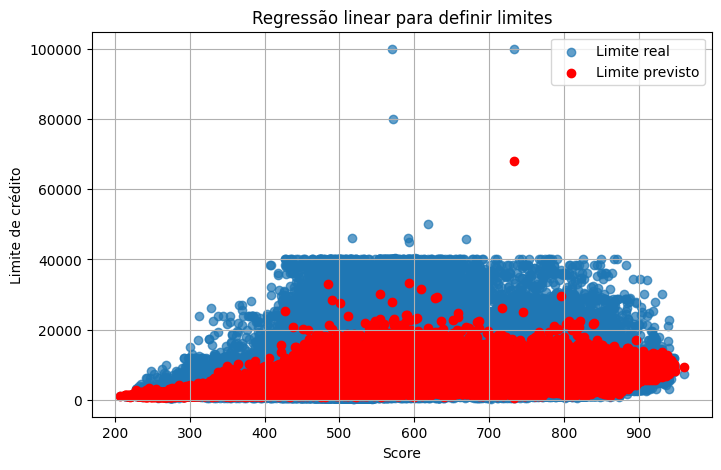

In [ ]:
# --- 5. Plot simples: Score vs Limite
relatorio_limites_train["limite_previsto"] = y_pred_xgb
plot.figure(figsize=(8,5))
plot.scatter(relatorio_limites_train["SCR"], relatorio_limites_train["limite_total_ultimo_mes"], label="Limite real", alpha=0.7)
plot.scatter(relatorio_limites_train["SCR"], relatorio_limites_train["limite_previsto"], label="Limite previsto", color="red")
plot.xlabel("Score")
plot.ylabel("Limite de crédito")
plot.title("Regressão linear para definir limites")
plot.legend()
plot.grid(True)
plot.show()

## Calibrar Limites

In [ ]:
# Calibrar Limites
limites_ordenados=relatorio_limites_train.sort_values("limite_previsto").reset_index(drop=True)
from sklearn.isotonic import IsotonicRegression
RI=IsotonicRegression()
x_iso = np.arange(len(relatorio_limites_train))
y_iso = limites_ordenados["limite_previsto"].values
y_iso_pred = RI.fit_transform(limites_ordenados["SCR"], limites_ordenados["limite_previsto"])
limites_ordenados["limite_previsto_isotonic"] = y_iso_pred

In [ ]:
mae = mean_absolute_error(y_iso, y_iso_pred)
mse = mean_squared_error(y_iso, y_iso_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_iso - y_iso_pred) / y)) * 100
r2 = r2_score(y_iso, y_iso_pred)
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"MAPE = {mape:.2f}%")
print(f"R²   = {r2:.3f}")

MAE  = 1460.08
MSE  = 3705108.37
RMSE = 1924.87
MAPE = 36.35%
R²   = 0.372


In [ ]:
limites_ordenados[["SCR","limite_previsto_isotonic","limite_previsto","limite_total_ultimo_mes"]].head()

,SCR,limite_previsto_isotonic,limite_previsto,limite_total_ultimo_mes
0,733.63,7128.38,574.46,500.00
1,480.12,4785.16,615.86,500.00
2,475.95,4767.65,632.36,460.00
3,276.27,1535.44,641.73,580.00
4,291.33,1636.08,644.72,920.00


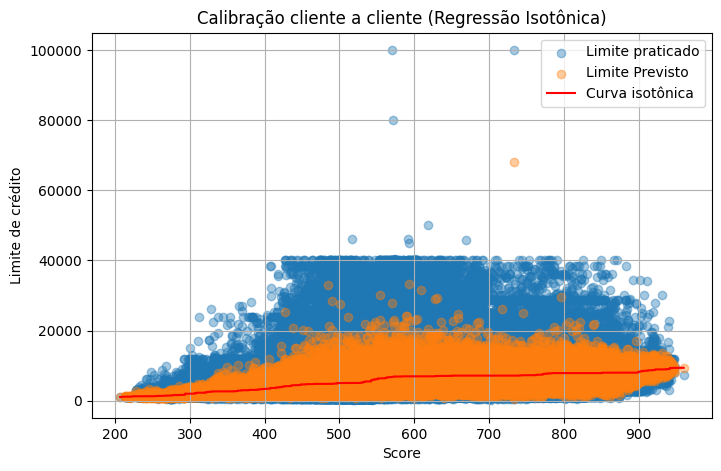

In [ ]:
# --- Plot ---
plot.figure(figsize=(8,5))
plot.scatter(limites_ordenados["SCR"], limites_ordenados["limite_total_ultimo_mes"], alpha=0.4, label="Limite praticado")
plot.scatter(limites_ordenados["SCR"], limites_ordenados["limite_previsto"], alpha=0.4, label="Limite Previsto")
plot.plot(np.sort(limites_ordenados["SCR"]), np.sort(limites_ordenados["limite_previsto_isotonic"]), color="red", label="Curva isotônica")
plot.xlabel("Score")
plot.ylabel("Limite de crédito")
plot.title("Calibração cliente a cliente (Regressão Isotônica)")
plot.legend()
plot.grid(True)
plot.show()

In [ ]:
limites_ordenados[(limites_ordenados["SCR"]>900) & (limites_ordenados["SCR"]<1000)][["SCR","limite_previsto_isotonic","limite_previsto","limite_total_ultimo_mes"]].sample(10)

,SCR,limite_previsto_isotonic,limite_previsto,limite_total_ultimo_mes
222267,919.05,8732.15,9943.74,11856.00
169485,906.38,8499.98,7772.55,11040.00
223961,928.03,8899.77,10126.94,5130.00
195196,928.00,8899.77,8562.18,10800.00
135003,916.16,8646.39,6826.06,6000.00
231058,901.27,8300.55,11704.93,5250.00
200345,935.86,8959.76,8741.83,7824.00
195467,921.47,8732.15,8571.78,9336.00
168617,904.39,8403.96,7745.26,7600.00
148232,901.67,8300.55,7167.95,7800.00


In [ ]:
limites_ordenados.describe()

,idade,tempo_relacionamento_kredilig_meses,limite_total,limite_total_utilizado,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,valor_da_parcela_aberto,principal_total_fechado,qtd_parcelas_pagas,media_atraso_dias,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,principal_total,cpf_cnpj,inad_e_reneg,Cluster,PD,inad_e_reneg_prev,rotulo_predito_base,Z,SCR,mean_limite_isotonic,%_variacao_limite,%_end,%_limite_utilizado,limite_previsto,limite_previsto_isotonic
count,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,234006.00,229324.00,229324.00,234006.00,145486.00,234006.00,234006.00
mean,50.50,50.30,5393.45,1768.34,4.02,2.09,0.12,253.01,4228.21,38.17,33.93,9.13,18.82,27.95,5622.29,5407.64,35.84,2094.09,0.15,7.82,4.70,6316.62,7469.87,7033.25,33616537600.97,0.30,1.64,0.40,0.38,0.40,0.70,610.70,7512.29,75.25,13.02,34.13,6212.80,6212.80
std,16.15,31.53,6180.01,3827.60,5.30,3.39,0.53,338.42,7211.87,52.44,94.45,10.85,12.97,11.26,7566.24,6615.41,191.55,796.72,1.46,10.01,5.64,4680.45,5602.47,9486.81,32114474503.50,0.46,1.23,0.31,0.49,0.49,1.93,139.47,1220.74,167.12,18.13,43.11,2428.76,1481.13
min,18.00,6.03,0.00,-2990.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.70,-0.17,-0.63,0.00,0.00,0.00,508.20,0.00,0.00,1.00,8.00,108.00,0.01,1148044.00,0.00,0.00,0.00,0.00,0.00,-4.90,206.85,3131.93,-91.69,0.00,-51.10,574.46,1017.73
25%,38.00,22.73,0.00,0.00,0.00,0.00,0.00,0.00,410.00,9.00,0.60,0.83,7.63,18.83,1105.00,1449.00,0.00,1617.00,0.00,0.16,1.00,3000.00,3600.00,1882.31,5343088922.00,0.00,1.00,0.10,0.00,0.00,-0.74,506.63,6756.84,-24.33,0.00,0.00,4312.53,5014.96
50%,51.00,43.70,4400.00,0.00,2.50,1.00,0.00,163.00,2153.90,20.00,4.00,3.83,17.07,31.20,3169.31,3383.99,0.00,1888.00,0.00,3.39,3.00,5508.00,6569.00,4101.74,13985423416.00,0.00,2.00,0.37,0.00,0.00,0.55,600.00,8308.06,15.63,8.02,17.07,6295.63,6929.88
75%,63.00,73.83,8800.00,1960.00,5.97,3.00,0.00,357.00,5234.24,47.00,17.67,15.13,30.87,38.23,7285.97,6989.87,0.00,2194.08,0.00,12.25,6.00,8256.00,9936.00,8645.17,63598009998.50,1.00,2.00,0.68,1.00,1.00,2.19,717.99,8308.06,99.36,18.06,59.06,7956.24,7128.38
max,100.00,125.53,100000.00,83391.92,41.47,126.00,14.00,9620.12,310660.49,1410.00,1200.00,41.70,42.20,41.60,310434.77,287161.52,12460.00,23447.00,122.00,60.00,133.00,80000.00,100000.00,329851.85,99997908953.00,1.00,4.00,0.99,1.00,1.00,5.54,960.01,8325.46,6156.34,460.52,1696.94,68149.26,9363.94


## Teste

In [ ]:
bins_risco_carregado = np.load("bins_risco.npy")
relatorio_prob_inad_test["fx_risco"]=pd.cut(relatorio_prob_inad_test.SCR, bins=bins_risco_carregado)

In [ ]:
relatorio_limites_test=relatorio_prob_inad_test.merge(resultados[["fx_risco","media_limite_isotonico"]],on="fx_risco", how="left")

In [ ]:
#Aplicar mesmas regras do treino

# Regras

In [ ]:
df_regras=relatorio_limites_train.drop(columns=["fx_PD","fx_risco"]).copy()                       

In [ ]:
df_regras['Fx_Grupo_Risco']=pd.cut(df_regras.SCR,bins=[-np.inf,382,438,467,485,517,534,552,573,611,np.inf],labels=["0-382","382-438","438-467","467-485","485-517","517-534","534-552","552-573","573-611","611-1000"])

In [ ]:
df_regras.Fx_Grupo_Risco.value_counts()

Fx_Grupo_Risco
611-1000    111349
485-517      21265
573-611      20765
382-438      13090
517-534      12647
552-573      12321
438-467      11742
534-552      11269
467-485      10071
0-382         9487
Name: count, dtype: int64

In [ ]:
pd.crosstab(df_regras["Fx_Grupo_Risco"], df_regras["inad_e_reneg"], margins=True)

inad_e_reneg,0,1,All
Fx_Grupo_Risco,,,
0-382,55,9432,9487
382-438,998,12092,13090
438-467,2448,9294,11742
467-485,3197,6874,10071
485-517,9534,11731,21265
517-534,7251,5396,12647
534-552,7160,4109,11269
552-573,8782,3539,12321
573-611,17059,3706,20765


In [ ]:
df_regras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234006 entries, 0 to 234005
Data columns (total 57 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   sexo                                      234006 non-null  object  
 1   idade                                     234006 non-null  int64   
 2   estado_civil                              234006 non-null  object  
 3   nacionalidade                             234006 non-null  object  
 4   tempo_relacionamento_kredilig_meses       234006 non-null  float64 
 5   situacao_conta                            234006 non-null  object  
 6   canal_origem                              234006 non-null  object  
 7   limite_total                              234006 non-null  float64 
 8   limite_total_utilizado                    234006 non-null  float64 
 9   data_ultima_alteracao_limite              94329 non-null   object  
 10  media_me

In [ ]:
limites_grupo_risco = (df_regras.groupby("Fx_Grupo_Risco").agg(
    qtd=("Fx_Grupo_Risco", "size"),
    media_limite=("limite_total_ultimo_mes", "mean"),
    media_limite_iso=("media_limite_isotonico", "mean"),
    mediana_limite=("limite_total_ultimo_mes", "median"),
    min_limite=("limite_total_ultimo_mes", "min"),
    max_limite=("limite_total_ultimo_mes", "max"),)
    .reset_index()
    )

C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_3828\3799998269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  limites_grupo_risco = (df_regras.groupby("Fx_Grupo_Risco").agg(


In [ ]:
limites_grupo_risco

,Fx_Grupo_Risco,qtd,media_limite,media_limite_iso,mediana_limite,min_limite,max_limite
0,0-382,9487,3132.28,3129.00,2137.73,400.00,28056.00
1,382-438,13090,5025.72,5035.68,3906.00,400.00,40000.00
2,438-467,11742,6269.11,6260.98,4896.00,400.00,40000.00
3,467-485,10071,6515.60,6514.86,5000.00,400.00,40000.00
4,485-517,21265,6749.02,6717.10,5250.00,400.00,40000.00
5,517-534,12647,6715.79,6786.48,5376.00,108.00,46080.00
6,534-552,11269,7436.22,7425.05,6237.00,250.00,40000.00
7,552-573,12321,8592.45,8250.31,7128.00,400.00,100000.00
8,573-611,20765,9153.85,8308.06,7500.00,400.00,46080.00
9,611-1000,111349,8128.17,8322.99,7452.00,300.00,100000.00


In [ ]:
df_regras[df_regras["Fx_Grupo_Risco"]=="573-611"].sample(10)

,sexo,idade,estado_civil,nacionalidade,tempo_relacionamento_kredilig_meses,situacao_conta,canal_origem,limite_total,limite_total_utilizado,data_ultima_alteracao_limite,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,valor_da_parcela_aberto,principal_total_fechado,qtd_parcelas_pagas,media_atraso_dias,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,ocupacao,grau_escolaridade_cat,regiao,tipo_cal_entre_contratos,tipo_valor_entrada,mean_atraso_possui_info,possui_contratos_a_vista,principal_total,cpf_cnpj,inad_e_reneg,fx_renda_valida,fx_principal_total_nr,fx_principal_total,fx_ult_limite,Cluster,PD,inad_e_reneg_prev,Modelo,rotulo_predito_base,Z,SCR,fx_SCR,media_limite_isotonico,%_variacao_limite,%_end,%_limite_utilizado,Fx_Grupo_Risco
179980,M,72,SOLTEIRO,BRASILEIRO,24.80,Ativa,Fisico,11592.00,0.00,NaN,0.00,1,0,0.00,5991.48,25,0.00,16.67,8.13,24.80,5108.64,2160.00,0.00,1653.00,EMPRESTIMO,0,0.00,2,7200.00,11592.00,APOSENTADO,ENSINO_MEDIO,Sul_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,NAO,5991.48,19386575949.00,0,"De 1 SM a 1,25 SM",R$2 mil a R$5mil,"R$5 mil a R$7,5 mil",R$10 mil a R$15mil,0,0.39,0,Floresta,0,0.45,592.58,"(579.147, 600.0]",8308.06,-28.33,0.00,0.00,573-611
99602,F,47,CASADO,BRASILEIRO,36.00,Ativa,Fisico,4763.00,0.00,NaN,12.03,2,0,0.00,6167.99,24,11.00,12.93,23.07,36.00,7549.30,6167.99,0.00,2100.00,FINANCIAMENTO,0,17.65,2,4536.00,4763.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Grande_Florianópolis,Contratos_dias_diferentes,N_Paga_entrada,SIM,N_base_CARTAO,6167.99,3410091998.00,0,"De 1,25 SM a 1,5 SM",R$5 mil a R$10mil,"R$5 mil a R$7,5 mil","R$2,5 mil a R$5 mil",1,0.40,0,Floresta,0,0.40,589.07,"(579.147, 600.0]",8308.06,74.43,0.00,0.00,573-611
189117,F,23,SOLTEIRO,BRASILEIRO,21.63,Ativa,Fisico,2000.00,0.00,NaN,0.00,1,0,0.00,880.00,11,13.00,8.83,12.80,21.63,880.00,880.00,0.00,2184.12,FINANCIAMENTO,0,24.00,1,920.00,2000.00,SERVIDOR_PUBLICO,ENSINO_MEDIO,Norte_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,NAO,880.00,12373963957.00,0,"De 1,25 SM a 1,5 SM",Até R$2 mil,Até R$1 mil,"R$1 mil a R$2,5 mil",4,0.34,0,Floresta,0,0.66,608.02,"(600.0, 622.11]",8308.06,315.40,0.00,0.00,573-611
212318,M,53,UNIAO ESTAVEL,BRASILEIRO,113.43,Ativa,Fisico,12000.00,4810.74,NaN,4.35,3,0,1315.74,10132.21,84,6.11,0.70,32.67,33.37,29038.58,21290.07,0.00,2069.75,EMPRESTIMO/FINANCIAMENTO,0,9.11,9,9768.00,12000.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Grande_Florianópolis,Contratos_dias_diferentes,N_Paga_entrada,SIM,NAO,21723.78,85178640934.00,0,"De 1,25 SM a 1,5 SM",Acima de R$20mil,Acima de R$20mil,R$10 mil a R$15mil,1,0.44,0,Floresta,0,0.24,577.80,"(558.508, 579.147]",8308.06,-30.77,63.57,40.09,573-611
170002,F,30,CASADO,BRASILEIRO,93.50,Ativa,Fisico,7524.00,0.00,NaN,0.00,1,0,0.00,2932.04,25,10.00,7.53,19.60,27.13,6420.75,2932.04,0.00,2129.00,EMPRESTIMO,0,13.33,1,2590.00,7524.00,EMPREGADO_PRIVADO_AUTONOMO,TECNICO_SUPERIOR,Grande_Florianópolis,Apenas_1_contrato,N_Paga_entrada,SIM,N_base_CARTAO,2932.04,8891610976.00,0,"De 1,25 SM a 1,5 SM",R$2 mil a R$5mil,"R$2,5 mil a R$5 mil","R$7,5 mil a R$10mil",2,0.41,0,Floresta,0,0.35,585.24,"(579.147, 600.0]",8308.06,10.42,0.00,0.00,573-611
121670,M,41,UNIAO ESTAVEL,ESTRANGEIRO,46.40,Bloqueada,Fisico,0.00,0.00,2023-06-10,3.53,0,0,145.00,0.00,24,87.00,25.27,15.13,40.40,1750.00,3090.00,0.00,1484.00,FINANCIAMENTO,0,0.00,2,3510.00,3510.00,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Vale_do_Itajaí,Contratos_dias_diferentes,N_Paga_entrada,NAO,NAO,3090.00,70895901277.00,1,Até 1 SM,R$2 mil a R$5mil,"R$2,5 mil a R$5 mil","R$2,5 mil a R$5 mil",2,0.33,0,Floresta,0,0.70,610.98,"(600.0, 622.11]",8308.06,136.70,9.77,NaN,573-611
202446,M,26,UNIAO ESTAVEL,BRASILEIRO,32.90,Ativa,Fisico,11040.00,0.00,NaN,8.07,2,0,0.00,12